# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from google.colab import drive
from sklearn.preprocessing import StandardScaler


# Cleaning Data

In [14]:
ab109316_ts_training_path = kagglehub.dataset_download('ab109316/ts-training')
print('Data source import complete.')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df_attack_28_2 = pd.read_csv(ab109316_ts_training_path+"/TS Training/data/anomaly_detection/multivariate/SWAT/SWaT.csv")
df_normal_22_28 = pd.read_csv(ab109316_ts_training_path+"/TS Training/data/anomaly_detection/multivariate/SWAT/SWaT_Dataset_Normal_v0.csv")

df_normal_22_28.columns = df_normal_22_28.columns.str.strip()
df_attack_28_2.columns = df_attack_28_2.columns.str.strip()

df_normal_22_28['Timestamp'] = pd.to_datetime(
    df_normal_22_28['Timestamp'].str.strip(),
    format='%d/%m/%Y %I:%M:%S %p',
    errors='coerce'
)

df_normal_22_28[df_normal_22_28['Timestamp'].isna()]

df_normal_22_28 = df_normal_22_28.sort_values("Timestamp")

df_attack_28_2['Timestamp'] = pd.to_datetime(
    df_attack_28_2['Timestamp'].str.strip(),
    format='%d/%m/%Y %I:%M:%S %p',
    errors='coerce'
)

df_attack_28_2[df_attack_28_2['Timestamp'].isna()]

df_attack_28_2 = df_attack_28_2.sort_values("Timestamp")

Using Colab cache for faster access to the 'ts-training' dataset.
Data source import complete.
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/A Dataset to Support Research in the Design of Secure Water Treatment Systems (1).pdf
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/process_1_attack.csv
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/process_1_normal.csv
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/SWAT/SWaT_Dataset_Normal_v1.csv
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/SWAT/SWaT.csv
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/SWAT/SWaT_Dataset_Normal_v0.csv
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/SWAT/readme/List_of_attacks_Final.xlsx
/kaggle/input/ts-training/TS Training/data/anomaly_detection/multivariate/SWAT/readme/A Dataset to Support Research in the Design of Secure Wa

In [15]:
df_attack_28_2['label'] = df_attack_28_2['Normal/Attack'].apply(lambda x: 0 if x == "Normal" else 1)
df_normal_22_28['label'] = df_normal_22_28['Normal/Attack'].apply(lambda x: 0 if x == "Normal" else 1)



In [16]:
df_attack_28_2 = df_attack_28_2.drop(columns=["Normal/Attack"])
df_normal_22_28 = df_normal_22_28.drop(columns=["Normal/Attack"])


In [17]:
df_attack_28_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  449919 non-null  datetime64[ns]
 1   FIT101     449919 non-null  float64       
 2   LIT101     449919 non-null  float64       
 3   MV101      449919 non-null  int64         
 4   P101       449919 non-null  int64         
 5   P102       449919 non-null  int64         
 6   AIT201     449919 non-null  float64       
 7   AIT202     449919 non-null  float64       
 8   AIT203     449919 non-null  float64       
 9   FIT201     449919 non-null  float64       
 10  MV201      449919 non-null  int64         
 11  P201       449919 non-null  int64         
 12  P202       449919 non-null  int64         
 13  P203       449919 non-null  int64         
 14  P204       449919 non-null  int64         
 15  P205       449919 non-null  int64         
 16  P206       449919 no

In [18]:
df_normal_22_28.describe()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,label
count,496800,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0,496800.0
mean,2015-12-25 12:59:59.499999744,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0,0.0
min,2015-12-22 16:00:00,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0,0.0
25%,2015-12-24 02:29:59.750000128,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0,0.0
50%,2015-12-25 12:59:59.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0,0.0
75%,2015-12-26 23:29:59.249999872,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0,0.0
max,2015-12-28 09:59:59,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0,0.0
std,NaN,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0,0.0


In [19]:
df_normal_22_28.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496800 entries, 0 to 496799
Data columns (total 53 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  496800 non-null  datetime64[ns]
 1   FIT101     496800 non-null  float64       
 2   LIT101     496800 non-null  float64       
 3   MV101      496800 non-null  int64         
 4   P101       496800 non-null  int64         
 5   P102       496800 non-null  int64         
 6   AIT201     496800 non-null  float64       
 7   AIT202     496800 non-null  float64       
 8   AIT203     496800 non-null  float64       
 9   FIT201     496800 non-null  float64       
 10  MV201      496800 non-null  int64         
 11  P201       496800 non-null  int64         
 12  P202       496800 non-null  int64         
 13  P203       496800 non-null  int64         
 14  P204       496800 non-null  int64         
 15  P205       496800 non-null  int64         
 16  P206       496800 no

In [20]:
df_full = pd.concat([df_normal_22_28, df_attack_28_2])

In [21]:
df_full.isna().sum()

,0
Timestamp,0
FIT101,0
LIT101,0
MV101,0
P101,0
P102,0
AIT201,0
AIT202,0
AIT203,0
FIT201,0


# PreProcessing


In [22]:
df_normal_22_28.set_index('Timestamp', inplace=True)
df_attack_28_2.set_index('Timestamp', inplace=True)

In [23]:
normal = df_normal_22_28.copy()
attack = df_attack_28_2.copy()

## Check Sampling Consistency

In [24]:
# df.index.to_series().diff().value_counts().head()

In [25]:
normal.index.to_series().diff().value_counts().head()

,count
Timestamp,
0 days 00:00:01,496799


In [26]:
attack.index.to_series().diff().value_counts().head()

,count
Timestamp,
0 days 00:00:01,449917
0 days 00:01:22,1


In [27]:
attack.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,label
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0


In [28]:
normal.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,label
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [29]:
# ── Check class distribution in attack file ───────────────
print("Attack file label distribution:")
print(attack['label'].value_counts())
print(f"Attack percentage: {attack['label'].mean()*100:.1f}%")

Attack file label distribution:
label
0    395298
1     54621
Name: count, dtype: int64
Attack percentage: 12.1%


## Separate Sensors from Actuators

In [30]:
# ── Continuous sensors (analog readings) ─────────────────
sensor_cols = [
    'FIT101', 'LIT101',                          # P1
    'AIT201', 'AIT202', 'AIT203', 'FIT201',      # P2
    'DPIT301', 'FIT301', 'LIT301',               # P3
    'AIT401', 'AIT402', 'FIT401', 'LIT401',      # P4
    'AIT501', 'AIT502', 'AIT503', 'AIT504',
    'FIT501', 'FIT502', 'FIT503', 'FIT504',
    'PIT501', 'PIT502', 'PIT503',                # P5
    'FIT601'                                     # P6
]

# ── Binary actuators (on/off, open/closed) ────────────────
actuator_cols = [
    'MV101', 'P101', 'P102',                      # P1
    'MV201', 'P201', 'P202', 'P203', 'P204',
    'P205', 'P206',                               # P2
    'MV301', 'MV302', 'MV303', 'MV304',
    'P301', 'P302',                               # P3
    'P401', 'P402', 'P403', 'P404', 'UV401',      # P4
    'P501', 'P502',                               # P5
    'P601', 'P602', 'P603'                        # P6
]

print(f"Sensor columns: {len(sensor_cols)}")
print(f"Actuator columns: {len(actuator_cols)}")

# Verify actuators are really binary
print("\nActuator unique values:")
for col in actuator_cols:
    print(f"  {col}: {sorted(normal[col].unique())}")

Sensor columns: 25
Actuator columns: 26

Actuator unique values:
  MV101: [np.int64(0), np.int64(1), np.int64(2)]
  P101: [np.int64(1), np.int64(2)]
  P102: [np.int64(1)]
  MV201: [np.int64(0), np.int64(1), np.int64(2)]
  P201: [np.int64(1)]
  P202: [np.int64(1)]
  P203: [np.int64(1), np.int64(2)]
  P204: [np.int64(1)]
  P205: [np.int64(1), np.int64(2)]
  P206: [np.int64(1)]
  MV301: [np.int64(0), np.int64(1), np.int64(2)]
  MV302: [np.int64(0), np.int64(1), np.int64(2)]
  MV303: [np.int64(0), np.int64(1), np.int64(2)]
  MV304: [np.int64(0), np.int64(1), np.int64(2)]
  P301: [np.int64(1), np.int64(2)]
  P302: [np.int64(1), np.int64(2)]
  P401: [np.int64(1)]
  P402: [np.int64(1), np.int64(2)]
  P403: [np.int64(1)]
  P404: [np.int64(1)]
  UV401: [np.int64(1), np.int64(2)]
  P501: [np.int64(1), np.int64(2)]
  P502: [np.int64(1)]
  P601: [np.int64(1)]
  P602: [np.int64(1), np.int64(2)]
  P603: [np.int64(1)]


## **Important Discovery — Actuators Are NOT Binary**
Your output reveals something critical. The previous code assumed actuators would be simple `0` and `1` values, but SWaT actually uses a **3-state encoding**. This is a known characteristic of the SWaT dataset that many beginners miss.

**What the 3 Values Actually Mean**

In SWaT, actuators use this encoding:

| Value | Meaning (Typical)                     | Applies To  |
| ----- | ------------------------------------- |-------------
| 0     | Closed / Off                          | Motorized Valves (MV) only
| 1     | Open / On                             | Pumps (P) + Valves (MV)
| 2     | Transition / Intermediate / Auto Mode | Pumps (P) + Valves (MV)


## **Important Observation**
Some actuators are constant:

P102, P201,
P202,
P204, P206, P401,
P403,
P404,
P502,
P601, P603

These **NEVER** change in normal data.
This is very important.


## check if the Attack data has different values or not

In [31]:
print(f"Sensor columns: {len(sensor_cols)}")
print(f"Actuator columns: {len(actuator_cols)}")

# Verify actuators are really binary
print("\nActuator unique values:")
for col in actuator_cols:
    print(f"  {col}: {sorted(attack[col].unique())}")

Sensor columns: 25
Actuator columns: 26

Actuator unique values:
  MV101: [np.int64(0), np.int64(1), np.int64(2)]
  P101: [np.int64(1), np.int64(2)]
  P102: [np.int64(1), np.int64(2)]
  MV201: [np.int64(0), np.int64(1), np.int64(2)]
  P201: [np.int64(1), np.int64(2)]
  P202: [np.int64(1)]
  P203: [np.int64(1), np.int64(2)]
  P204: [np.int64(1), np.int64(2)]
  P205: [np.int64(1), np.int64(2)]
  P206: [np.int64(1), np.int64(2)]
  MV301: [np.int64(0), np.int64(1), np.int64(2)]
  MV302: [np.int64(0), np.int64(1), np.int64(2)]
  MV303: [np.int64(0), np.int64(1), np.int64(2)]
  MV304: [np.int64(0), np.int64(1), np.int64(2)]
  P301: [np.int64(1)]
  P302: [np.int64(1), np.int64(2)]
  P401: [np.int64(1)]
  P402: [np.int64(1), np.int64(2)]
  P403: [np.int64(1), np.int64(2)]
  P404: [np.int64(1)]
  UV401: [np.int64(1), np.int64(2)]
  P501: [np.int64(1), np.int64(2)]
  P502: [np.int64(1)]
  P601: [np.int64(1)]
  P602: [np.int64(1), np.int64(2)]
  P603: [np.int64(1)]


In [32]:
act_one_value_normal = []
act_one_value_attack = []

print("Actuators with only 1 state in normal data (standby devices):")
for col in actuator_cols:
    if normal[col].nunique() == 1:
        val = normal[col].unique()[0]
        act_one_value_normal.append(col)
        print(f"  {col}: always = {val}")

print("\nActuators with only 1 state in attack data (standby devices):")
for col in actuator_cols:
    if attack[col].nunique() == 1:
      val = attack[col].unique()[0]
      act_one_value_attack.append(col)
      print(f"  {col}: always = {val}")

print("\nCheck if they activate during attacks:")
for col in actuator_cols:
    if normal[col].nunique() == 1:
        attack_unique = attack[col].nunique()
        if attack_unique > 1:
            print(f"  {col}: activates during attacks! → strong anomaly signal")

Actuators with only 1 state in normal data (standby devices):
  P102: always = 1
  P201: always = 1
  P202: always = 1
  P204: always = 1
  P206: always = 1
  P401: always = 1
  P403: always = 1
  P404: always = 1
  P502: always = 1
  P601: always = 1
  P603: always = 1

Actuators with only 1 state in attack data (standby devices):
  P202: always = 1
  P301: always = 1
  P401: always = 1
  P404: always = 1
  P502: always = 1
  P601: always = 1
  P603: always = 1

Check if they activate during attacks:
  P102: activates during attacks! → strong anomaly signal
  P201: activates during attacks! → strong anomaly signal
  P204: activates during attacks! → strong anomaly signal
  P206: activates during attacks! → strong anomaly signal
  P403: activates during attacks! → strong anomaly signal


In [33]:
act_one_value_both = list(set(act_one_value_normal) & set(act_one_value_attack))

In [34]:
act_one_value_both

['P404', 'P603', 'P202', 'P502', 'P401', 'P601']

## What Should You Do Next?
Remove constant features. ['P202', 'P601', 'P502', 'P603', 'P401', 'P404']

Why?

- They provide zero information

- They distort scaling

- They increase model size unnecessarily

In [35]:
normal.drop(columns=act_one_value_both, inplace=True)
attack.drop(columns=act_one_value_both, inplace=True)

In [36]:
attack.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 449919 entries, 2015-12-28 10:00:00 to 2016-01-02 14:59:59
Data columns (total 46 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   449919 non-null  float64
 1   LIT101   449919 non-null  float64
 2   MV101    449919 non-null  int64  
 3   P101     449919 non-null  int64  
 4   P102     449919 non-null  int64  
 5   AIT201   449919 non-null  float64
 6   AIT202   449919 non-null  float64
 7   AIT203   449919 non-null  float64
 8   FIT201   449919 non-null  float64
 9   MV201    449919 non-null  int64  
 10  P201     449919 non-null  int64  
 11  P203     449919 non-null  int64  
 12  P204     449919 non-null  int64  
 13  P205     449919 non-null  int64  
 14  P206     449919 non-null  int64  
 15  DPIT301  449919 non-null  float64
 16  FIT301   449919 non-null  float64
 17  LIT301   449919 non-null  float64
 18  MV301    449919 non-null  int64  
 19  MV302    449919 non-null  int64

In [37]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496800 entries, 2015-12-22 16:00:00 to 2015-12-28 09:59:59
Data columns (total 46 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   496800 non-null  float64
 1   LIT101   496800 non-null  float64
 2   MV101    496800 non-null  int64  
 3   P101     496800 non-null  int64  
 4   P102     496800 non-null  int64  
 5   AIT201   496800 non-null  float64
 6   AIT202   496800 non-null  float64
 7   AIT203   496800 non-null  float64
 8   FIT201   496800 non-null  float64
 9   MV201    496800 non-null  int64  
 10  P201     496800 non-null  int64  
 11  P203     496800 non-null  int64  
 12  P204     496800 non-null  int64  
 13  P205     496800 non-null  int64  
 14  P206     496800 non-null  int64  
 15  DPIT301  496800 non-null  float64
 16  FIT301   496800 non-null  float64
 17  LIT301   496800 non-null  float64
 18  MV301    496800 non-null  int64  
 19  MV302    496800 non-null  int64

## Remove the first 5 hours (system stabilization)

In [38]:
# SWaT took ~5 hours to stabilize from empty state
# This period has abnormal readings even in "normal" data
stabilization_cutoff = normal.index[0] + pd.Timedelta(hours=5)
normal_stable = normal[normal.index > stabilization_cutoff]
print(f"\nNormal data shape after removing stabilization period: {normal_stable.shape}")


Normal data shape after removing stabilization period: (478799, 46)


In [39]:
# sensor_cols = [
#     'FIT101', 'LIT101',                          # P1
#     'AIT201', 'AIT202', 'AIT203', 'FIT201',      # P2
#     'DPIT301', 'FIT301', 'LIT301',               # P3
#     'AIT401', 'AIT402', 'FIT401', 'LIT401',      # P4
#     'AIT501', 'AIT502', 'AIT503', 'AIT504',
#     'FIT501', 'FIT502', 'FIT503', 'FIT504',
#     'PIT501', 'PIT502', 'PIT503',                # P5
#     'FIT601'                                     # P6
# ]

# # ── Binary actuators (on/off, open/closed) ────────────────
# actuator_cols = [
#     'MV101', 'P101', 'P102',                      # P1
#     'MV201', 'P201', 'P203', 'P204',
#     'P205', 'P206',                               # P2
#     'MV301', 'MV302', 'MV303', 'MV304',
#     'P301', 'P302',                               # P3
#     'P402', 'P403', 'UV401',      # P4
#     'P501',                               # P5'P602',                        # P6
# ]

In [40]:
# from sklearn.preprocessing import MinMaxScaler

# # ── Fit scaler on NORMAL data only ────────────────────────
# # Never fit on attack data — that would leak anomaly info
# scaler = MinMaxScaler()
# scaler.fit(normal_stable[sensor_cols])

# # ── Apply to both normal and attack ───────────────────────
# normal_scaled = normal_stable.copy()
# attack_scaled = df_attack_28_2.copy()

# normal_scaled[sensor_cols] = scaler.transform(normal_stable[sensor_cols])
# attack_scaled[sensor_cols] = scaler.transform(df_attack_28_2[sensor_cols])

# # ── Actuators stay as 0/1 ─────────────────────────────────
# # Binary values don't need scaling
# # Just make sure they are integer 0 or 1
# for col in actuator_cols:
#     normal_scaled[col] = normal_stable[col].astype(int)
#     attack_scaled[col] = df_attack_28_2[col].astype(int)

# # ── Save scaler for use in deployment ─────────────────────
# import joblib
# joblib.dump(scaler, 'swat_scaler.pkl')
# print("Scaler saved.")

## Check for Timestamp Gaps

In [41]:
def check_timestamp_gaps(df, name="Dataset", expected_freq='1S'):
    """
    Detects gaps in the time index where rows are completely missing.
    In SWaT (1Hz), any gap > 1 second means lost data.
    """
    # Full expected time range
    full_range = pd.date_range(
        start=df.index.min(),
        end=df.index.max(),
        freq=expected_freq
    )

    # Find missing timestamps
    missing_timestamps = full_range.difference(df.index)

    print(f"\n── {name} Timestamp Analysis ──────────────────────────")
    print(f"  Expected rows : {len(full_range):,}")
    print(f"  Actual rows   : {len(df):,}")
    print(f"  Missing rows  : {len(missing_timestamps):,}")

    if len(missing_timestamps) > 0:
        # Group consecutive missing timestamps into gap periods
        gaps = []
        gap_start = missing_timestamps[0]
        prev = missing_timestamps[0]

        for ts in missing_timestamps[1:]:
            if (ts - prev).seconds > 1:
                gaps.append((gap_start, prev, (prev - gap_start).seconds + 1))
                gap_start = ts
            prev = ts
        gaps.append((gap_start, prev, (prev - gap_start).seconds + 1))

        print(f"\n  Gap periods found: {len(gaps)}")
        print(f"  {'Start':<25} {'End':<25} {'Duration (sec)'}")
        print(f"  {'─'*25} {'─'*25} {'─'*14}")
        for start, end, duration in gaps[:10]:  # Show first 10
            print(f"  {str(start):<25} {str(end):<25} {duration}")

        if len(gaps) > 10:
            print(f"  ... and {len(gaps)-10} more gaps")

    return missing_timestamps

normal_gaps = check_timestamp_gaps(normal_stable, "Normal Data")
attack_gaps = check_timestamp_gaps(attack, "Attack Data")


── Normal Data Timestamp Analysis ──────────────────────────
  Expected rows : 478,799
  Actual rows   : 478,799
  Missing rows  : 0

── Attack Data Timestamp Analysis ──────────────────────────
  Expected rows : 450,000
  Actual rows   : 449,919
  Missing rows  : 81

  Gap periods found: 1
  Start                     End                       Duration (sec)
  ───────────────────────── ───────────────────────── ──────────────
  2015-12-31 21:00:37       2015-12-31 21:01:57       81


/tmp/ipython-input-3998137108.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(


In [42]:
attack.index.to_series().diff().value_counts().head()

,count
Timestamp,
0 days 00:00:01,449917
0 days 00:01:22,1


## Detect Flat-Line Periods (Stuck Sensors)

In [43]:
def detect_flatlines(df, sensor_cols, window=60, name="Dataset"):
    """
    Detects sensors that stay at a constant value for more than
    'window' consecutive seconds. In SWaT, 60 seconds is suspicious.
    """
    print(f"\n── {name}: Flat-line Detection (>{window}s) ──────────────")

    flatline_report = {}

    for col in sensor_cols:
        series = df[col]

        # Rolling standard deviation — zero std = flat line
        rolling_std = series.rolling(window=window).std()
        flat_periods = rolling_std[rolling_std == 0]

        if len(flat_periods) > 0:
            flat_pct = len(flat_periods) / len(series) * 100
            flatline_report[col] = {
                'flat_seconds': len(flat_periods),
                'flat_pct': round(flat_pct, 2),
                'constant_value': series[rolling_std == 0].iloc[0]
                    if len(flat_periods) > 0 else None
            }
            print(f"  ⚠ {col:<12}: {len(flat_periods):>6} seconds flat "
                  f"({flat_pct:.1f}%) at value={flatline_report[col]['constant_value']:.4f}")

    if not flatline_report:
        print(f"  ✓ No significant flat-line periods detected")

    return flatline_report

normal_flatlines = detect_flatlines(normal_stable, sensor_cols, window=60, name="Normal")
attack_flatlines = detect_flatlines(attack[sensor_cols], sensor_cols, window=60, name="Attack")


── Normal: Flat-line Detection (>60s) ──────────────
  ⚠ FIT101      : 124669 seconds flat (26.0%) at value=0.0000
  ⚠ AIT201      : 284204 seconds flat (59.4%) at value=262.3366
  ⚠ AIT202      :   7153 seconds flat (1.5%) at value=8.3548
  ⚠ AIT203      :  22105 seconds flat (4.6%) at value=422.9941
  ⚠ FIT201      : 112440 seconds flat (23.5%) at value=0.0000
  ⚠ DPIT301     :  37296 seconds flat (7.8%) at value=2.2185
  ⚠ FIT301      :  56635 seconds flat (11.8%) at value=0.0000
  ⚠ AIT401      : 435840 seconds flat (91.0%) at value=0.0000
  ⚠ AIT402      :   4459 seconds flat (0.9%) at value=192.8480
  ⚠ AIT501      : 160044 seconds flat (33.4%) at value=7.8658
  ⚠ AIT502      :   5203 seconds flat (1.1%) at value=180.3896
  ⚠ AIT503      :  45040 seconds flat (9.4%) at value=270.6678
  ⚠ AIT504      :  92665 seconds flat (19.4%) at value=11.9200
  ⚠ FIT501      :     14 seconds flat (0.0%) at value=1.7016
  ⚠ FIT503      :  13578 seconds flat (2.8%) at value=0.7410
  ⚠ FIT504   

## Detect Outliers in Normal Data

In [44]:
def detect_outliers_iqr(df, sensor_cols, name="Dataset"):
    """
    Uses IQR (Interquartile Range) method to detect outliers.
    A value is an outlier if it falls more than 3×IQR
    outside the quartile range.
    """
    print(f"\n── {name}: Outlier Detection (IQR method) ───────────────")

    outlier_summary = {}

    for col in sensor_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]

        if len(outliers) > 0:
            outlier_pct = len(outliers) / len(df) * 100
            outlier_summary[col] = {
                'count': len(outliers),
                'pct': round(outlier_pct, 3),
                'lower_bound': round(lower, 3),
                'upper_bound': round(upper, 3)
            }
            print(f"  ⚠ {col:<12}: {len(outliers):>5} outliers "
                  f"({outlier_pct:.2f}%) "
                  f"bounds=[{lower:.2f}, {upper:.2f}]")

    if not outlier_summary:
        print(f"  ✓ No significant outliers detected")

    return outlier_summary

normal_outliers = detect_outliers_iqr(normal_stable, sensor_cols, "Normal")


── Normal: Outlier Detection (IQR method) ───────────────
  ⚠ AIT202      :  9528 outliers (1.99%) bounds=[8.18, 8.58]
  ⚠ AIT203      : 54885 outliers (11.46%) bounds=[304.28, 357.75]
  ⚠ DPIT301     : 97735 outliers (20.41%) bounds=[18.57, 21.04]
  ⚠ FIT301      : 99557 outliers (20.79%) bounds=[2.18, 2.24]
  ⚠ AIT401      : 66660 outliers (13.92%) bounds=[148.79, 148.82]
  ⚠ PIT502      :  5082 outliers (1.06%) bounds=[0.62, 1.63]
  ⚠ FIT601      :  7562 outliers (1.58%) bounds=[-0.00, 0.00]


## Fix All Issues Found

In [45]:
def fix_data_quality(df, sensor_cols, actuator_cols):
    """
    Applies all data quality fixes in the correct order.
    """
    df_fixed = df.copy()

    # ── Fix 1: Reindex to fill timestamp gaps ─────────────
    # Creates rows for missing timestamps, filled with NaN
    full_range = pd.date_range(
        start=df_fixed.index.min(),
        end=df_fixed.index.max(),
        freq='1S'
    )
    df_fixed = df_fixed.reindex(full_range)
    print(f"✓ Reindexed: {len(df_fixed):,} rows (gaps filled with NaN)")

    # ── Fix 2: Forward fill short gaps (≤ 5 seconds) ──────
    # Short gaps = sensor dropout, safe to interpolate
    df_fixed[sensor_cols] = (
        df_fixed[sensor_cols]
        .fillna(method='ffill', limit=5)
    )
    print(f"✓ Forward-filled gaps up to 5 seconds")

    # ── Fix 3: Interpolate remaining sensor gaps ───────────
    # Longer gaps get linear interpolation
    df_fixed[sensor_cols] = (
        df_fixed[sensor_cols]
        .interpolate(method='linear', limit=30)
    )
    print(f"✓ Interpolated remaining gaps up to 30 seconds")

    # ── Fix 4: Forward fill actuator gaps ─────────────────
    # Actuators hold their last known state (no interpolation)
    df_fixed[actuator_cols] = (
        df_fixed[actuator_cols]
        .fillna(method='ffill')
    )
    print(f"✓ Forward-filled actuator states")

    # ── Fix 5: Drop rows still missing after all fixes ────
    # Only if gaps were too large to interpolate
    rows_before = len(df_fixed)
    df_fixed.dropna(subset=sensor_cols, inplace=True)
    rows_dropped = rows_before - len(df_fixed)
    if rows_dropped > 0:
        print(f"⚠ Dropped {rows_dropped} rows with unresolvable gaps")
    else:
        print(f"✓ No rows dropped — all gaps resolved")

    # ── Fix 6: Clip extreme outliers in normal data ────────
    # Only clip at very extreme values — 5×IQR
    for col in sensor_cols:
        Q1 = df_fixed[col].quantile(0.25)
        Q3 = df_fixed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 5 * IQR
        upper = Q3 + 5 * IQR
        df_fixed[col] = df_fixed[col].clip(lower=lower, upper=upper)
    print(f"✓ Extreme outliers clipped at 5×IQR bounds")

    return df_fixed

actuator_cols = [col for col in actuator_cols if col not in act_one_value_both]

# Apply fixes
normal_clean = fix_data_quality(normal_stable, sensor_cols, actuator_cols)
attack_clean  = fix_data_quality(attack, sensor_cols, actuator_cols)

print(f"\nFinal shapes:")
print(f"  Normal: {normal_clean.shape}")
print(f"  Attack: {attack_clean.shape}")

/tmp/ipython-input-776042470.py:9: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(
/tmp/ipython-input-776042470.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill', limit=5)


✓ Reindexed: 478,799 rows (gaps filled with NaN)
✓ Forward-filled gaps up to 5 seconds
✓ Interpolated remaining gaps up to 30 seconds
✓ Forward-filled actuator states


/tmp/ipython-input-776042470.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')


✓ No rows dropped — all gaps resolved
✓ Extreme outliers clipped at 5×IQR bounds
✓ Reindexed: 450,000 rows (gaps filled with NaN)


/tmp/ipython-input-776042470.py:9: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(
/tmp/ipython-input-776042470.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill', limit=5)


✓ Forward-filled gaps up to 5 seconds
✓ Interpolated remaining gaps up to 30 seconds
✓ Forward-filled actuator states


/tmp/ipython-input-776042470.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')


⚠ Dropped 46 rows with unresolvable gaps
✓ Extreme outliers clipped at 5×IQR bounds

Final shapes:
  Normal: (478799, 46)
  Attack: (449954, 46)


In [46]:
def final_quality_check(df, sensor_cols, actuator_cols, name="Dataset"):
    print(f"\n{'='*50}")
    print(f"  FINAL QUALITY REPORT — {name}")
    print(f"{'='*50}")
    print(f"  Total rows       : {len(df):,}")
    print(f"  Sensor columns   : {len(sensor_cols)}")
    print(f"  Actuator columns : {len(actuator_cols)}")

    # Missing values
    total_missing = df[sensor_cols + actuator_cols].isnull().sum().sum()
    print(f"  Missing values   : {total_missing}")

    # Timestamp continuity
    time_diffs = pd.Series(df.index).diff().dropna()
    max_gap = time_diffs.max()
    print(f"  Max timestamp gap: {max_gap}")

    # Value ranges per sensor
    print(f"\n  Sensor value ranges:")
    for col in sensor_cols:
        print(f"    {col:<12}: "
              f"min={df[col].min():.3f}  "
              f"max={df[col].max():.3f}  "
              f"mean={df[col].mean():.3f}  "
              f"std={df[col].std():.3f}")

    print(f"\n  ✓ Ready for normalization" if total_missing == 0
          else f"\n  ✗ Still has {total_missing} missing values — review fixes")
    print(f"{'='*50}\n")

final_quality_check(normal_clean, sensor_cols, actuator_cols, "Normal")
final_quality_check(attack_clean, sensor_cols, actuator_cols, "Attack")


  FINAL QUALITY REPORT — Normal
  Total rows       : 478,799
  Sensor columns   : 25
  Actuator columns : 20
  Missing values   : 0
  Max timestamp gap: 0 days 00:00:01

  Sensor value ranges:
    FIT101      : min=0.000  max=2.745  mean=1.835  std=1.140
    LIT101      : min=486.381  max=817.557  mean=593.878  std=114.884
    AIT201      : min=252.852  max=272.526  mean=263.820  std=4.836
    AIT202      : min=8.314  max=8.698  mean=8.382  std=0.056
    AIT203      : min=312.279  max=373.032  mean=334.108  std=15.109
    FIT201      : min=0.000  max=2.488  mean=1.823  std=1.065
    DPIT301     : min=17.866  max=20.555  mean=19.479  std=0.833
    FIT301      : min=2.167  max=2.259  mean=2.207  std=0.020
    LIT301      : min=785.135  max=1014.724  mean=907.507  std=71.385
    AIT401      : min=148.779  max=148.832  mean=148.801  std=0.009
    AIT402      : min=153.781  max=194.514  mean=170.132  std=11.088
    FIT401      : min=1.673  max=1.748  mean=1.710  std=0.013
    LIT401      :

In [47]:
def check_timestamp_gaps(df, name="Dataset", expected_freq='1S'):
    """
    Detects gaps in the time index where rows are completely missing.
    In SWaT (1Hz), any gap > 1 second means lost data.
    """
    # Full expected time range
    full_range = pd.date_range(
        start=df.index.min(),
        end=df.index.max(),
        freq=expected_freq
    )

    # Find missing timestamps
    missing_timestamps = full_range.difference(df.index)

    print(f"\n── {name} Timestamp Analysis ──────────────────────────")
    print(f"  Expected rows : {len(full_range):,}")
    print(f"  Actual rows   : {len(df):,}")
    print(f"  Missing rows  : {len(missing_timestamps):,}")

    if len(missing_timestamps) > 0:
        # Group consecutive missing timestamps into gap periods
        gaps = []
        gap_start = missing_timestamps[0]
        prev = missing_timestamps[0]

        for ts in missing_timestamps[1:]:
            if (ts - prev).seconds > 1:
                gaps.append((gap_start, prev, (prev - gap_start).seconds + 1))
                gap_start = ts
            prev = ts
        gaps.append((gap_start, prev, (prev - gap_start).seconds + 1))

        print(f"\n  Gap periods found: {len(gaps)}")
        print(f"  {'Start':<25} {'End':<25} {'Duration (sec)'}")
        print(f"  {'─'*25} {'─'*25} {'─'*14}")
        for start, end, duration in gaps[:10]:  # Show first 10
            print(f"  {str(start):<25} {str(end):<25} {duration}")

        if len(gaps) > 10:
            print(f"  ... and {len(gaps)-10} more gaps")

    return missing_timestamps

normal_gaps = check_timestamp_gaps(normal_clean, "Normal Data")
attack_gaps = check_timestamp_gaps(attack_clean, "Attack Data")


── Normal Data Timestamp Analysis ──────────────────────────
  Expected rows : 478,799
  Actual rows   : 478,799
  Missing rows  : 0

── Attack Data Timestamp Analysis ──────────────────────────
  Expected rows : 450,000
  Actual rows   : 449,954
  Missing rows  : 46

  Gap periods found: 1
  Start                     End                       Duration (sec)
  ───────────────────────── ───────────────────────── ──────────────
  2015-12-31 21:01:12       2015-12-31 21:01:57       46


/tmp/ipython-input-282786974.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(


## Attack Data — One Gap Found
Start                |   End                 |    Duration
---------------------|  -------------------- |--------------
2015-12-31 21:01:12  |  2015-12-31 21:01:57  |  46 seconds


There is exactly one gap of 46 consecutive seconds on December 31st at around 9pm.

Cross-Reference With the Attack Log
Looking at your `attack list PDF`, on December 31st the attacks were:


Attack #      | Start              | End      | Point
--------------|--------------------|----------|---------
27            | 31/12/2015 01:17:08| 01:45:18 | P-302, LIT-401
28 |31/12/2015 01:45:19 |11:15:27 |P-302
29 |31/12/2015 15:32:00 |15:34:00 | P-201, P-203, P-205
30 |31/12/2015 15:47:40 |16:07:10|LIT-101, P-101, MV-201
**Gap** |21:01:12 |21:01:57
31 | 31/12/2015 22:05:34 | 22:11:40 | LIT-401



The gap falls between Attack 30 (ends 16:07) and Attack 31 (starts 22:05). This means the 46-second gap happened during a **normal** operation period between attacks — not during an attack itself.


## Verify

In [48]:
# ── Inspect the gap context ───────────────────────────────
gap_start = pd.Timestamp('2015-12-31 21:01:12')
gap_end   = pd.Timestamp('2015-12-31 21:01:57')

# Look at 2 minutes before and after the gap
context_start = gap_start - pd.Timedelta(minutes=2)
context_end   = gap_end   + pd.Timedelta(minutes=2)

context = attack_clean.loc[context_start:context_end,
                     ['LIT101', 'FIT101', 'LIT301', 'label']]

print("Sensor readings around the gap:")
print(context.to_string())

# Check what label was assigned around the gap
print(f"\nLabel values around gap:")
print(context['label'].value_counts())

Sensor readings around the gap:
                         LIT101  FIT101      LIT301  label
2015-12-31 20:59:12  810.805000     0.0  978.675400    0.0
2015-12-31 20:59:13  810.844200     0.0  977.954400    0.0
2015-12-31 20:59:14  810.687200     0.0  977.233400    0.0
2015-12-31 20:59:15  810.647900     0.0  976.752800    0.0
2015-12-31 20:59:16  810.687200     0.0  976.472400    0.0
2015-12-31 20:59:17  810.569500     0.0  975.951700    0.0
2015-12-31 20:59:18  810.687200     0.0  975.631300    0.0
2015-12-31 20:59:19  810.687200     0.0  974.990400    0.0
2015-12-31 20:59:20  811.354500     0.0  974.870200    0.0
2015-12-31 20:59:21  811.629300     0.0  974.229400    0.0
2015-12-31 20:59:22  811.668500     0.0  973.868900    0.0
2015-12-31 20:59:23  811.472300     0.0  973.588500    0.0
2015-12-31 20:59:24  811.354500     0.0  972.787500    0.0
2015-12-31 20:59:25  811.629300     0.0  972.186600    0.0
2015-12-31 20:59:26  811.864800     0.0  971.986400    0.0
2015-12-31 20:59:27  812

## Fix

In [49]:
# ── Fix: Reindex and forward fill the gap ─────────────────
full_range = pd.date_range(
    start=attack_clean.index.min(),
    end=attack_clean.index.max(),
    freq='1S'
)

attack_reindexed = attack_clean.reindex(full_range)

# Forward fill sensors (carry last known reading)
attack_reindexed[sensor_cols] = (
    attack_reindexed[sensor_cols]
    .fillna(method='ffill', limit=60)
)

# Forward fill actuators (hold last known state)
attack_reindexed[actuator_cols] = (
    attack_reindexed[actuator_cols]
    .fillna(method='ffill')
)

# Forward fill label (gap was in normal period so it stays 0)
attack_reindexed['label'] = (
    attack_reindexed['label']
    .fillna(method='ffill')
)

# ── Verify the fix ────────────────────────────────────────
print(f"Rows before fix : {len(attack_clean):,}")
print(f"Rows after fix  : {len(attack_reindexed):,}")
print(f"Still missing   : {attack_reindexed.isnull().sum().sum()}")
print(f"Gap filled with label: {attack_reindexed.loc[gap_start:gap_end, 'label'].unique()}")


/tmp/ipython-input-881131378.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(
/tmp/ipython-input-881131378.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill', limit=60)


Rows before fix : 449,954
Rows after fix  : 450,000
Still missing   : 0
Gap filled with label: [0.]


/tmp/ipython-input-881131378.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')
/tmp/ipython-input-881131378.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')


In [50]:
normal_gaps = check_timestamp_gaps(normal_clean, "Normal Data")
attack_gaps = check_timestamp_gaps(attack_reindexed, "Attack Data")


── Normal Data Timestamp Analysis ──────────────────────────
  Expected rows : 478,799
  Actual rows   : 478,799
  Missing rows  : 0

── Attack Data Timestamp Analysis ──────────────────────────
  Expected rows : 450,000
  Actual rows   : 450,000
  Missing rows  : 0


/tmp/ipython-input-282786974.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(


In [51]:
attack_reindexed.isna().sum()

,0
FIT101,0
LIT101,0
MV101,0
P101,0
P102,0
AIT201,0
AIT202,0
AIT203,0
FIT201,0
MV201,0


# SMOOTHING

In [52]:
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np

def apply_smoothing(df, sensor_cols, method='rolling',
                    window=5):
    """
    Applies smoothing to continuous sensor columns only.
    Actuators are intentionally skipped — their state
    changes are real discrete events, not noise.

    Parameters:
    ───────────
    df          : cleaned dataframe from Stage 4
    sensor_cols : continuous sensor column names only
    method      : 'rolling'  → simple moving average
                  'ewm'      → exponential weighted mean
                  'savgol'   → Savitzky-Golay filter
    window      : smoothing window in seconds
                  5 = safe maximum for SWaT sensors

    Returns:
    ────────
    df_smooth   : dataframe with smoothed sensor columns
                  actuator columns are unchanged
    """
    df_smooth = df.copy()

    if method == 'rolling':
        # ── Simple moving average ─────────────────────────
        # center=True means window is centered on each point
        # min_periods=1 handles edges without creating NaNs
        for col in sensor_cols:
            df_smooth[col] = (
                df[col]
                .rolling(window=window,
                         center=True,
                         min_periods=1)
                .mean()
            )

    elif method == 'ewm':
        # ── Exponential weighted mean ─────────────────────
        # Better for sensors that trend gradually (LIT sensors)
        # Gives more weight to recent readings
        for col in sensor_cols:
            df_smooth[col] = df[col].ewm(span=window).mean()

    elif method == 'savgol':
        # ── Savitzky-Golay filter ─────────────────────────
        # Best at preserving peaks and sharp transitions
        # window must be odd number
        sg_window = window if window % 2 == 1 else window + 1
        for col in sensor_cols:
            df_smooth[col] = savgol_filter(
                df[col].values,
                window_length=sg_window,
                polyorder=2
            )

    # ── Verify actuators were NOT smoothed ────────────────
    actuator_check = [c for c in df.columns
                      if c not in sensor_cols
                      and c != 'label']
    for col in actuator_check:
        assert (df_smooth[col] == df[col]).all(), \
            f"ERROR: Actuator {col} was accidentally modified"

    return df_smooth

In [53]:
print("\n── Applying smoothing ───────────────────────────────────")

# Apply to normal data
normal_smooth = apply_smoothing(
    normal_clean,
    sensor_cols=sensor_cols,
    method='rolling',
    window=5
)

# Apply SAME settings to attack data
attack_smooth = apply_smoothing(
    attack_clean,
    sensor_cols=sensor_cols,
    method='rolling',
    window=5
)

# ── Verify smoothing worked correctly ─────────────────────
print("\n  Verification:")
for col in sensor_cols[:3]:   # check first 3 sensors
    raw_std    = normal_clean[col].std()
    smooth_std = normal_smooth[col].std()
    reduction  = (1 - smooth_std / raw_std) * 100
    print(f"  {col:<12}: std {raw_std:.4f} → {smooth_std:.4f} "
          f"(noise reduced {reduction:.1f}%)")

print(f"\n  ✓ Normal data smoothed: {normal_smooth.shape}")
print(f"  ✓ Attack data smoothed : {attack_smooth.shape}")
print(f"  ✓ Actuators unchanged  : verified")





── Applying smoothing ───────────────────────────────────

  Verification:
  FIT101      : std 1.1403 → 1.1397 (noise reduced 0.0%)
  LIT101      : std 114.8838 → 114.8826 (noise reduced 0.0%)
  AIT201      : std 4.8362 → 4.8361 (noise reduced 0.0%)

  ✓ Normal data smoothed: (478799, 46)
  ✓ Attack data smoothed : (449954, 46)
  ✓ Actuators unchanged  : verified


# Normalization

## Inspect sensor distributions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

# ── Inspect sensor distributions ─────────────────────────
print("── Sensor Statistics (Normal Data) ──────────────────────")
print(f"{'Sensor':<12} {'Min':>8} {'Max':>8} {'Mean':>8} "
      f"{'Std':>8} {'Skew':>8}")
print("─" * 58)

skewed_sensors = []
for col in sensor_cols:
    mn   = normal_clean[col].min()
    mx   = normal_clean[col].max()
    mean = normal_clean[col].mean()
    std  = normal_clean[col].std()
    skew = normal_clean[col].skew()

    print(f"{col:<12} {mn:>8.3f} {mx:>8.3f} {mean:>8.3f} "
          f"{std:>8.3f} {skew:>8.3f}")

    if abs(skew) > 2:
        skewed_sensors.append(col)

print(f"\nHighly skewed sensors (|skew| > 2): {skewed_sensors}")

── Sensor Statistics (Normal Data) ──────────────────────
Sensor            Min      Max     Mean      Std     Skew
──────────────────────────────────────────────────────────
FIT101          0.000    2.745    1.835    1.140   -0.976
LIT101        486.381  817.557  593.878  114.884    0.962
AIT201        252.852  272.526  263.820    4.836   -0.655
AIT202          8.314    8.698    8.382    0.056    3.542
AIT203        312.279  373.032  334.108   15.109    1.742
FIT201          0.000    2.488    1.823    1.065   -1.123
DPIT301        17.866   20.555   19.479    0.833   -1.333
FIT301          2.167    2.259    2.207    0.020   -1.048
LIT301        785.135 1014.724  907.507   71.385   -0.124
AIT401        148.779  148.832  148.801    0.009   -1.574
AIT402        153.781  194.514  170.132   11.088    0.514
FIT401          1.673    1.748    1.710    0.013    0.229
LIT401        774.340 1003.935  892.160   59.175   -0.090
AIT501          7.809    7.925    7.877    0.025   -0.405
AIT502       

## Visualize Sensor Distributions

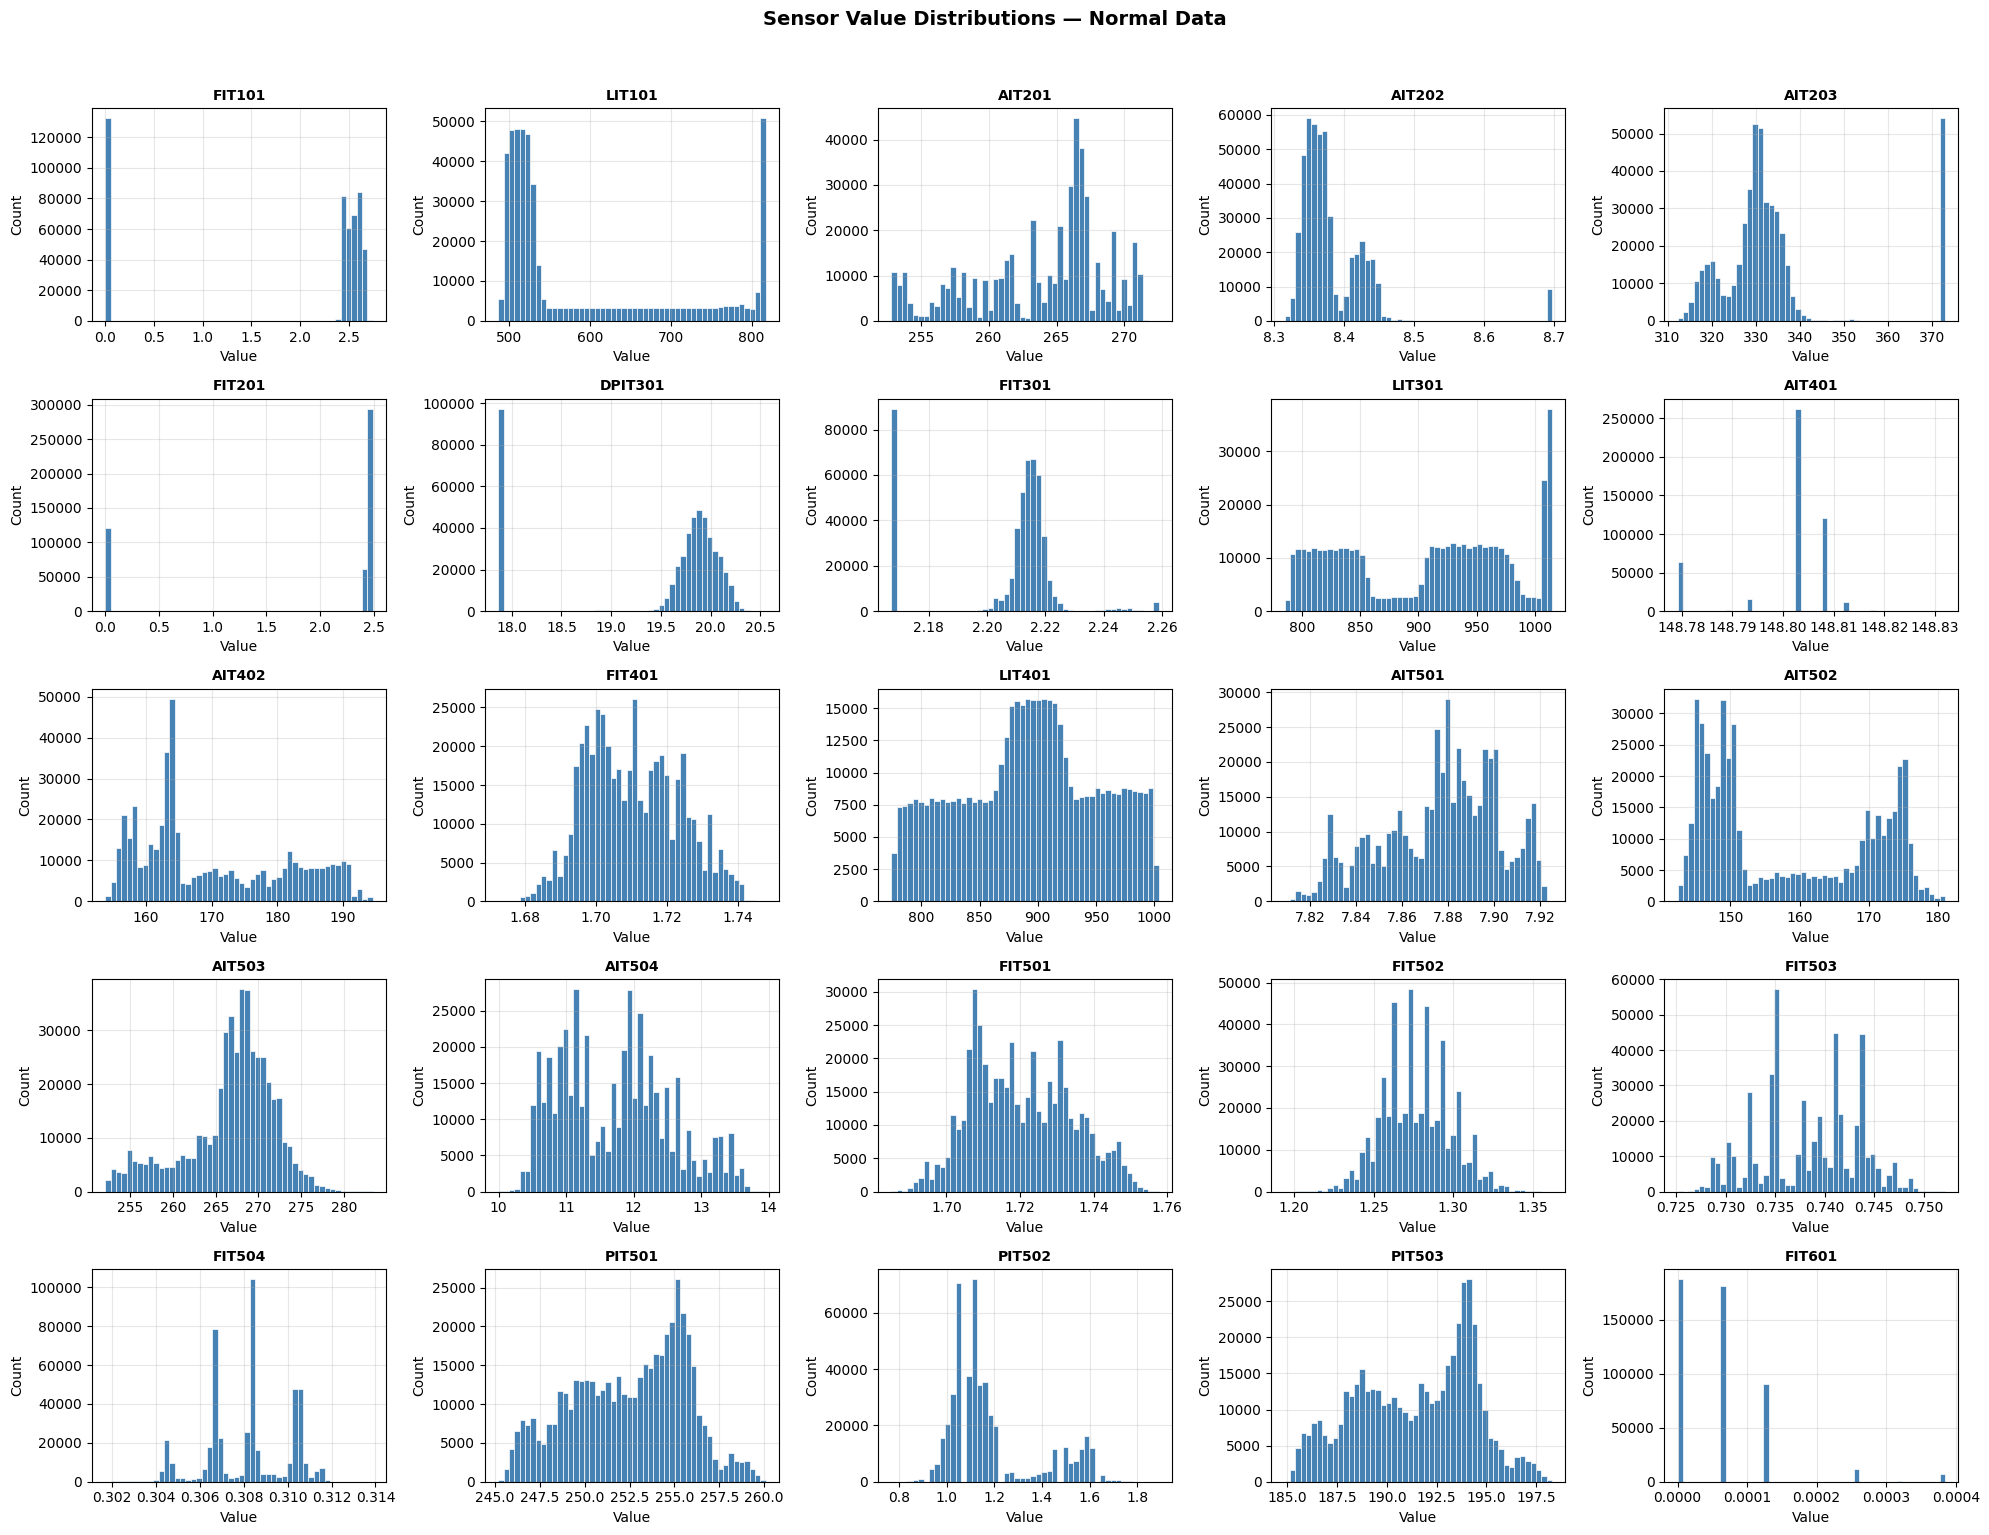

In [ ]:
# ── Plot distributions for all sensors ───────────────────
n_sensors = len(sensor_cols)
n_cols = 5
n_rows = (n_sensors + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(sensor_cols):
    axes[i].hist(
        normal_clean[col].dropna(),
        bins=50,
        color='steelblue',
        edgecolor='white',
        linewidth=0.5
    )
    axes[i].set_title(col, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Sensor Value Distributions — Normal Data',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('sensor_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

## Choose the Right Scaler

In [56]:
# ── Decision logic for scaler selection ──────────────────

def choose_scaler(series, name):
    """
    Returns the recommended scaler type for a given sensor.

    MinMaxScaler  → sensor has clear physical bounds (level, pressure)
    StandardScaler → sensor has roughly normal distribution
    RobustScaler  → sensor is heavily skewed or has many outliers
    """
    skew = abs(series.skew())

    # Check for outliers using IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outlier_pct = len(series[
        (series < Q1 - 1.5*IQR) |
        (series > Q3 + 1.5*IQR)
    ]) / len(series) * 100

    if outlier_pct > 5 or skew > 2:
        recommendation = "RobustScaler"
        reason = f"skew={skew:.1f}, outliers={outlier_pct:.1f}%"
    elif skew < 1:
        recommendation = "MinMaxScaler"
        reason = f"low skew={skew:.1f}, well-bounded"
    else:
        recommendation = "StandardScaler"
        reason = f"moderate skew={skew:.1f}"

    return recommendation, reason

print("── Scaler Recommendation Per Sensor ─────────────────────")
print(f"{'Sensor':<12} {'Recommended':<18} {'Reason'}")
print("─" * 60)

scaler_map = {}
for col in sensor_cols:
    rec, reason = choose_scaler(normal_clean[col], col)
    scaler_map[col] = rec
    print(f"{col:<12} {rec:<18} {reason}")

── Scaler Recommendation Per Sensor ─────────────────────
Sensor       Recommended        Reason
────────────────────────────────────────────────────────────
FIT101       MinMaxScaler       low skew=1.0, well-bounded
LIT101       MinMaxScaler       low skew=1.0, well-bounded
AIT201       MinMaxScaler       low skew=0.7, well-bounded
AIT202       RobustScaler       skew=3.5, outliers=2.2%
AIT203       RobustScaler       skew=1.7, outliers=13.4%
FIT201       StandardScaler     moderate skew=1.1
DPIT301      RobustScaler       skew=1.3, outliers=20.9%
FIT301       RobustScaler       skew=1.0, outliers=21.3%
LIT301       MinMaxScaler       low skew=0.1, well-bounded
AIT401       RobustScaler       skew=1.6, outliers=17.6%
AIT402       MinMaxScaler       low skew=0.5, well-bounded
FIT401       MinMaxScaler       low skew=0.2, well-bounded
LIT401       MinMaxScaler       low skew=0.1, well-bounded
AIT501       MinMaxScaler       low skew=0.4, well-bounded
AIT502       MinMaxScaler       low 

## Apply Normalization

In [57]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ── Separate sensors by scaler type ──────────────────────
minmax_sensors = [c for c in sensor_cols
                  if scaler_map[c] == "MinMaxScaler"]
robust_sensors = [c for c in sensor_cols
                  if scaler_map[c] in ["RobustScaler", "StandardScaler"]]

print(f"MinMax sensors : {len(minmax_sensors)}")
print(f"Robust sensors : {len(robust_sensors)}")

# ── Fit scalers on NORMAL data only ──────────────────────
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
robust_scaler = RobustScaler()

# Fit
if minmax_sensors:
    minmax_scaler.fit(normal_smooth[minmax_sensors])
if robust_sensors:
    robust_scaler.fit(normal_smooth[robust_sensors])

# ── Apply to normal data ──────────────────────────────────
normal_scaled = normal_smooth.copy()

if minmax_sensors:
    normal_scaled[minmax_sensors] = minmax_scaler.transform(
        normal_smooth[minmax_sensors]
    )
if robust_sensors:
    normal_scaled[robust_sensors] = robust_scaler.transform(
        normal_smooth[robust_sensors]
    )

# ── Apply to attack data ──────────────────────────────────
# Using the SAME scalers fitted on normal data
attack_scaled = attack_smooth.copy()

if minmax_sensors:
    attack_scaled[minmax_sensors] = minmax_scaler.transform(
        attack_smooth[minmax_sensors]
    )
if robust_sensors:
    attack_scaled[robust_sensors] = robust_scaler.transform(
        attack_smooth[robust_sensors]
    )

print("\n✓ Normalization applied to both datasets")

MinMax sensors : 16
Robust sensors : 9

✓ Normalization applied to both datasets


## Handle Actuators

In [59]:
# ── One-hot encode actuators (for LSTM / Autoencoder) ─────
def encode_actuators_consistent(normal_df, attack_df, actuator_cols):
    """
    Fits encoding on normal data, applies to both.
    Ensures attack data cannot introduce new categories.
    """
    normal_encoded = normal_df.copy()
    attack_encoded = attack_df.copy()

    new_cols = []

    # Use normal data to define all possible states
    for col in actuator_cols:
        # Get states from normal data only
        normal_states = sorted(normal_df[col].dropna().unique())

        # Add any extra states seen in attack (e.g. actuator forced to state 0)
        attack_states = sorted(attack_df[col].dropna().unique())
        all_states = sorted(set(normal_states) | set(attack_states))

        for state in all_states:
            new_col = f"{col}_s{int(state)}"
            normal_encoded[new_col] = (normal_df[col] == state).astype(int)
            attack_encoded[new_col] = (attack_df[col] == state).astype(int)
            new_cols.append(new_col)

        # Drop original
        normal_encoded.drop(columns=[col], inplace=True)
        attack_encoded.drop(columns=[col], inplace=True)

    return normal_encoded, attack_encoded, new_cols

normal_final, attack_final, encoded_actuator_cols = encode_actuators_consistent(
    normal_scaled, attack_scaled, actuator_cols
)

print(f"Original actuator columns : {len(actuator_cols)}")
print(f"After encoding            : {len(encoded_actuator_cols)}")
print(f"\nTotal features now:")
print(f"  Sensors   : {len(sensor_cols)}")
print(f"  Actuators : {len(encoded_actuator_cols)}")
print(f"  Total     : {len(sensor_cols) + len(encoded_actuator_cols)}")

Original actuator columns : 20
After encoding            : 46

Total features now:
  Sensors   : 25
  Actuators : 46
  Total     : 71


In [60]:
encoded_actuator_cols

['MV101_s0',
 'MV101_s1',
 'MV101_s2',
 'P101_s1',
 'P101_s2',
 'P102_s1',
 'P102_s2',
 'MV201_s0',
 'MV201_s1',
 'MV201_s2',
 'P201_s1',
 'P201_s2',
 'P203_s1',
 'P203_s2',
 'P204_s1',
 'P204_s2',
 'P205_s1',
 'P205_s2',
 'P206_s1',
 'P206_s2',
 'MV301_s0',
 'MV301_s1',
 'MV301_s2',
 'MV302_s0',
 'MV302_s1',
 'MV302_s2',
 'MV303_s0',
 'MV303_s1',
 'MV303_s2',
 'MV304_s0',
 'MV304_s1',
 'MV304_s2',
 'P301_s1',
 'P301_s2',
 'P302_s1',
 'P302_s2',
 'P402_s1',
 'P402_s2',
 'P403_s1',
 'P403_s2',
 'UV401_s1',
 'UV401_s2',
 'P501_s1',
 'P501_s2',
 'P602_s1',
 'P602_s2']

## Verify Normalization

In [61]:
# ── Check 1: Normal sensor ranges should be [0, 1] ────────
print("── Normal data ranges after scaling ─────────────────────")
print(f"{'Sensor':<12} {'Min':>8} {'Max':>8} {'Status'}")
print("─" * 40)

all_good = True
for col in minmax_sensors:
    mn = normal_final[col].min()
    mx = normal_final[col].max()
    status = "✓" if (mn >= -0.01 and mx <= 1.01) else "✗ OUT OF RANGE"
    if status != "✓":
        all_good = False
    print(f"{col:<12} {mn:>8.4f} {mx:>8.4f} {status}")

print(f"\n{'✓ All sensors in range' if all_good else '✗ Some sensors out of range'}")

# ── Check 2: Attack data CAN go out of [0,1] ──────────────
# This is expected and desirable — it signals anomalies
print("\n── Attack data out-of-range values (anomaly signals) ────")
print(f"{'Sensor':<12} {'Min':>8} {'Max':>8} {'Out-of-range rows':>20}")
print("─" * 55)

for col in minmax_sensors:
    mn  = attack_final[col].min()
    mx  = attack_final[col].max()
    oor = len(attack_final[
        (attack_final[col] < 0) |
        (attack_final[col] > 1)
    ])
    marker = " ← anomaly signal" if oor > 0 else ""
    print(f"{col:<12} {mn:>8.4f} {mx:>8.4f} {oor:>20}{marker}")

# ── Check 3: Labels survived normalization ────────────────
print(f"\n── Label integrity check ─────────────────────────────────")
print(f"Normal label distribution : {normal_final['label'].value_counts().to_dict()}")
print(f"Attack label distribution : {attack_final['label'].value_counts().to_dict()}")

── Normal data ranges after scaling ─────────────────────
Sensor            Min      Max Status
────────────────────────────────────────
FIT101         0.0000   1.0000 ✓
LIT101         0.0000   1.0000 ✓
AIT201         0.0000   1.0000 ✓
LIT301         0.0000   1.0000 ✓
AIT402         0.0000   1.0000 ✓
FIT401         0.0000   1.0000 ✓
LIT401         0.0000   1.0000 ✓
AIT501         0.0000   1.0000 ✓
AIT502         0.0000   1.0000 ✓
AIT504         0.0000   1.0000 ✓
FIT501         0.0000   1.0000 ✓
FIT502         0.0000   1.0000 ✓
FIT503         0.0000   1.0000 ✓
FIT504         0.0000   1.0000 ✓
PIT501         0.0000   1.0000 ✓
PIT503         0.0000   1.0000 ✓

✓ All sensors in range

── Attack data out-of-range values (anomaly signals) ────
Sensor            Min      Max    Out-of-range rows
───────────────────────────────────────────────────────
FIT101         0.0000   1.0081                    6 ← anomaly signal
LIT101        -0.8964   1.3248                 6965 ← anomaly signal
AIT201

In [62]:
# ── Check 1: Normal sensor ranges should be [0, 1] ────────
print("── Normal data ranges after scaling ─────────────────────")
print(f"{'Sensor':<12} {'Min':>8} {'Max':>8} {'Status'}")
print("─" * 40)

all_good = True
for col in robust_sensors:
    mn = normal_final[col].min()
    mx = normal_final[col].max()
    status = "✓" if (mn >= -0.01 and mx <= 1.01) else "✗ OUT OF RANGE"
    if status != "✓":
        all_good = False
    print(f"{col:<12} {mn:>8.4f} {mx:>8.4f} {status}")

print(f"\n{'✓ All sensors in range' if all_good else '✗ Some sensors out of range'}")

# ── Check 2: Attack data CAN go out of [0,1] ──────────────
# This is expected and desirable — it signals anomalies
print("\n── Attack data out-of-range values (anomaly signals) ────")
print(f"{'Sensor':<12} {'Min':>8} {'Max':>8} {'Out-of-range rows':>20}")
print("─" * 55)

for col in robust_sensors:
    mn  = attack_final[col].min()
    mx  = attack_final[col].max()
    oor = len(attack_final[
        (attack_final[col] < 0) |
        (attack_final[col] > 1)
    ])
    marker = " ← anomaly signal" if oor > 0 else ""
    print(f"{col:<12} {mn:>8.4f} {mx:>8.4f} {oor:>20}{marker}")

# ── Check 3: Labels survived normalization ────────────────
print(f"\n── Label integrity check ─────────────────────────────────")
print(f"Normal label distribution : {normal_final['label'].value_counts().to_dict()}")
print(f"Attack label distribution : {attack_final['label'].value_counts().to_dict()}")

── Normal data ranges after scaling ─────────────────────
Sensor            Min      Max Status
────────────────────────────────────────
AIT202        -0.8950   5.7127 ✗ OUT OF RANGE
AIT203        -2.4228   5.5302 ✗ OUT OF RANGE
FIT201        -0.9967   0.0182 ✗ OUT OF RANGE
DPIT301       -5.6721   2.0276 ✗ OUT OF RANGE
FIT301        -5.7469   5.5663 ✗ OUT OF RANGE
AIT401        -5.0000   6.0000 ✗ OUT OF RANGE
AIT503        -2.8765   2.8588 ✗ OUT OF RANGE
PIT502        -2.1818   5.1137 ✗ OUT OF RANGE
FIT601        -1.0000   5.0000 ✗ OUT OF RANGE

✗ Some sensors out of range

── Attack data out-of-range values (anomaly signals) ────
Sensor            Min      Max    Out-of-range rows
───────────────────────────────────────────────────────
AIT202       -13.2873   6.3260               359871 ← anomaly signal
AIT203        -5.9497   7.0115               348334 ← anomaly signal
FIT201        -0.9967   0.1567               175282 ← anomaly signal
DPIT301      -13.0571  12.3665               2

## Save Everything

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import os
os.makedirs('swat_preprocessed', exist_ok=True)

# ── Save processed datasets ───────────────────────────────
normal_final.to_csv('swat_preprocessed/normal_scaled.csv')
attack_final.to_csv('swat_preprocessed/attack_scaled.csv')

# ── Save scalers ──────────────────────────────────────────
joblib.dump(minmax_scaler, 'swat_preprocessed/minmax_scaler.pkl')
joblib.dump(robust_scaler, 'swat_preprocessed/robust_scaler.pkl')

# ── Save feature column lists ─────────────────────────────
import json
feature_config = {
    'sensor_cols'          : sensor_cols,
    'minmax_sensors'       : minmax_sensors,
    'robust_sensors'       : robust_sensors,
    'actuator_cols'        : actuator_cols,
    'encoded_actuator_cols': encoded_actuator_cols,
    'all_feature_cols'     : sensor_cols + encoded_actuator_cols
}

# ── Save smoothing config for documentation ───────────────
import json
smoothing_config = {
    'method'          : 'rolling',
    'window_seconds'  : 5,
    'applied_to'      : 'sensor_cols only',
    'actuators_touched': False,
    'applied_before'  : 'normalization',
    'sensors_smoothed': sensor_cols
}

with open('swat_preprocessed/smoothing_config.json', 'w') as f:
    json.dump(smoothing_config, f, indent=2)

with open('swat_preprocessed/feature_config.json', 'w') as f:
    json.dump(feature_config, f, indent=2)

print("✓ Saved:")
print("  swat_preprocessed/normal_scaled.csv")
print("  swat_preprocessed/attack_scaled.csv")
print("  swat_preprocessed/minmax_scaler.pkl")
print("  swat_preprocessed/robust_scaler.pkl")
print("  swat_preprocessed/feature_config.json")
print("  swat_preprocessed/smoothing_config.json")

✓ Saved:
  swat_preprocessed/normal_scaled.csv
  swat_preprocessed/attack_scaled.csv
  swat_preprocessed/minmax_scaler.pkl
  swat_preprocessed/robust_scaler.pkl
  swat_preprocessed/feature_config.json
  swat_preprocessed/smoothing_config.json


In [66]:
# copy swat_preprocessed to DepiProject folder
!cp -r swat_preprocessed /content/drive/MyDrive/DepiProject

 ## Load Preprocessed Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

# ── Load processed data ───────────────────────────────────
normal_final = pd.read_csv(
    '/content/drive/MyDrive/DepiPrpject/swat_preprocessed/normal_scaled.csv',
    index_col=0, parse_dates=True
)
attack_final = pd.read_csv(
    '/content/drive/MyDrive/DepiPrpject/swat_preprocessed/attack_scaled.csv',
    index_col=0, parse_dates=True
)

# ── Load feature config ───────────────────────────────────
with open('/content/drive/MyDrive/DepiPrpject/swat_preprocessed/feature_config.json', 'r') as f:
    feature_config = json.load(f)

sensor_cols           = feature_config['sensor_cols']
minmax_sensors        = feature_config['minmax_sensors']
robust_sensors        = feature_config['robust_sensors']
encoded_actuator_cols = feature_config['encoded_actuator_cols']
all_feature_cols      = feature_config['all_feature_cols']

print(f"Normal data shape  : {normal_final.shape}")
print(f"Attack data shape  : {attack_final.shape}")
print(f"Total features     : {len(all_feature_cols)}")

Normal data shape  : (478799, 72)
Attack data shape  : (449954, 72)
Total features     : 71


In [2]:
robust_sensors

['AIT202',
 'AIT203',
 'FIT201',
 'DPIT301',
 'FIT301',
 'AIT401',
 'AIT503',
 'PIT502',
 'FIT601']

In [3]:
normal_final['AIT202'].describe()

,AIT202
count,478799.000000
mean,0.265360
std,0.969682
min,-0.895031
25%,-0.287303
50%,0.000000
75%,0.712697
max,5.712697


# Windowing

In [5]:
def analyze_window_sizes(attack_df, label_col='label',
                         sizes=[10, 30, 60, 120]):
    """
    For each window size, shows:
    - How many total windows are created
    - How many windows contain at least one attack second
    - The minimum attack duration that would be detected
    """
    print("── Window Size Analysis ─────────────────────────────────")
    print(f"{'Size':>6} {'Total Windows':>15} {'Attack Windows':>15} "
          f"{'Attack %':>10} {'Min Detectable':>16}")
    print("─" * 67)

    for size in sizes:
        labels = attack_df[label_col].values
        total = len(labels) - size

        attack_windows = 0
        for i in range(0, total, 1):
            window_labels = labels[i:i+size]
            if window_labels.max() > 0:
                attack_windows += 1

        attack_pct = attack_windows / total * 100

        print(f"{size:>6} {total:>15,} {attack_windows:>15,} "
              f"{attack_pct:>9.1f}% {size:>14} sec")

analyze_window_sizes(attack_final, sizes=[10, 30, 60, 120])

── Window Size Analysis ─────────────────────────────────
  Size   Total Windows  Attack Windows   Attack %   Min Detectable
───────────────────────────────────────────────────────────────────
    10         449,944          54,936      12.2%             10 sec
    30         449,924          55,636      12.4%             30 sec
    60         449,894          56,668      12.6%             60 sec
   120         449,834          58,662      13.0%            120 sec


## Label Assignment Strategies

In [8]:
def demonstrate_label_strategies(attack_df, window_size=30):
    """
    Shows the difference between label assignment strategies
    using a sample window that spans normal and attack data.
    """
    labels = attack_df['label'].values

    # Find a window that contains both normal and attack rows
    mixed_window_idx = None
    for i in range(len(labels) - window_size):
        window = labels[i:i+window_size]
        if window.max() == 1 and window.min() == 0:
            mixed_window_idx = i
            break

    if mixed_window_idx is None:
        print("No mixed window found in sample")
        return

    window = labels[mixed_window_idx:mixed_window_idx+window_size]
    attack_count  = window.sum()
    normal_count  = window_size - attack_count
    attack_pct    = attack_count / window_size * 100

    print(f"── Label Strategy Comparison (window_size={window_size}) ──")
    print(f"  Window contains: {normal_count} normal + {attack_count} attack seconds")
    print(f"  Attack % in window: {attack_pct:.1f}%")
    print()
    print(f"  Strategy A — ANY attack second → label=1")
    print(f"    Result: {'Attack (1)' if window.max() > 0 else 'Normal (0)'}")
    print(f"    Use when: You want maximum recall (catch every attack)")
    print()
    print(f"  Strategy B — MAJORITY vote → label=majority class")
    majority = 1 if attack_count > normal_count else 0
    print(f"    Result: {'Attack (1)' if majority == 1 else 'Normal (0)'}")
    print(f"    Use when: You want to reduce false positives")
    print()
    print(f"  Strategy C — LAST timestep label")
    print(f"    Result: {'Attack (1)' if window[-1] == 1 else 'Normal (0)'}")
    print(f"    Use when: You care about the current moment only")
    print()
    print(f"  Strategy D — threshold (>50% attack → label=1)")
    threshold_label = 1 if attack_pct > 50 else 0
    print(f"    Result: {'Attack (1)' if threshold_label == 1 else 'Normal (0)'}")
    print(f"    Use when: You want balanced sensitivity")

demonstrate_label_strategies(attack_final, window_size=30)

── Label Strategy Comparison (window_size=30) ──
  Window contains: 29.0 normal + 1.0 attack seconds
  Attack % in window: 3.3%

  Strategy A — ANY attack second → label=1
    Result: Attack (1)
    Use when: You want maximum recall (catch every attack)

  Strategy B — MAJORITY vote → label=majority class
    Result: Normal (0)
    Use when: You want to reduce false positives

  Strategy C — LAST timestep label
    Result: Attack (1)
    Use when: You care about the current moment only

  Strategy D — threshold (>50% attack → label=1)
    Result: Normal (0)
    Use when: You want balanced sensitivity


## The Windowing Function

In [9]:
def create_windows(data, labels, window_size=30, stride=1,
                   label_strategy='any'):
    """
    Converts time series data into overlapping windows.

    Parameters:
    ───────────
    data           : numpy array of shape (timesteps, features)
    labels         : numpy array of shape (timesteps,)
    window_size    : number of timesteps per window
    stride         : step size between consecutive windows
    label_strategy : how to assign label to window
                     'any'      → 1 if ANY timestep is attack
                     'majority' → 1 if >50% timesteps are attack
                     'last'     → label of the last timestep
                     'threshold'→ 1 if >X% timesteps are attack

    Returns:
    ────────
    X : numpy array of shape (n_windows, window_size, n_features)
    y : numpy array of shape (n_windows,)
    """

    n_samples  = len(data)
    n_features = data.shape[1]
    n_windows  = (n_samples - window_size) // stride + 1

    # Pre-allocate arrays for efficiency
    X = np.zeros((n_windows, window_size, n_features), dtype=np.float32)
    y = np.zeros(n_windows, dtype=np.int8)

    for i, start in enumerate(range(0, n_samples - window_size, stride)):
        end = start + window_size

        # Extract window
        X[i] = data[start:end]

        # Assign label based on strategy
        window_labels = labels[start:end]

        if label_strategy == 'any':
            y[i] = 1 if window_labels.max() > 0 else 0

        elif label_strategy == 'majority':
            y[i] = 1 if window_labels.mean() > 0.5 else 0

        elif label_strategy == 'last':
            y[i] = window_labels[-1]

        elif label_strategy == 'threshold':
            y[i] = 1 if window_labels.mean() > 0.3 else 0

    return X, y


# ── Extract feature matrix and label array ─────────────────
normal_data   = normal_final[all_feature_cols].values.astype(np.float32)
normal_labels = normal_final['label'].values.astype(np.int8)

attack_data   = attack_final[all_feature_cols].values.astype(np.float32)
attack_labels = attack_final['label'].values.astype(np.int8)

print(f"Normal data matrix  : {normal_data.shape}")
print(f"Attack data matrix  : {attack_data.shape}")

Normal data matrix  : (478799, 71)
Attack data matrix  : (449954, 71)


/tmp/ipython-input-3102203415.py:61: RuntimeWarning: invalid value encountered in cast
  attack_labels = attack_final['label'].values.astype(np.int8)


## Create Windows for Each Dataset

In [10]:
WINDOW_SIZE = 30   # 30 seconds per window
STRIDE_TRAIN = 1   # maximum overlap for training (richest data)
STRIDE_TEST  = 1   # stride=1 for testing (no missed detections)

print("── Creating windows ─────────────────────────────────────")

# ── Normal windows (training data) ───────────────────────
X_normal, y_normal = create_windows(
    normal_data, normal_labels,
    window_size=WINDOW_SIZE,
    stride=STRIDE_TRAIN,
    label_strategy='any'
)
print(f"Normal windows  : {X_normal.shape}  |  labels: {y_normal.shape}")
print(f"  Label check   : all zeros = {(y_normal == 0).all()}")

# ── Attack windows (test data) ────────────────────────────
X_attack, y_attack = create_windows(
    attack_data, attack_labels,
    window_size=WINDOW_SIZE,
    stride=STRIDE_TEST,
    label_strategy='any'
)
print(f"\nAttack windows  : {X_attack.shape}  |  labels: {y_attack.shape}")
print(f"  Normal windows: {(y_attack == 0).sum():,}")
print(f"  Attack windows: {(y_attack == 1).sum():,}")
print(f"  Attack %      : {y_attack.mean()*100:.1f}%")

── Creating windows ─────────────────────────────────────
Normal windows  : (478770, 30, 71)  |  labels: (478770,)
  Label check   : all zeros = True

Attack windows  : (449925, 30, 71)  |  labels: (449925,)
  Normal windows: 394,289
  Attack windows: 55,636
  Attack %      : 12.4%


## Verify Window Content

In [11]:
def inspect_window(X, y, idx, feature_names, n_features_to_show=5):
    """
    Prints the content of a single window for manual verification.
    """
    window = X[idx]
    label  = y[idx]

    print(f"── Window #{idx} ─────────────────────────────────────────")
    print(f"  Shape  : {window.shape}  (timesteps × features)")
    print(f"  Label  : {'ATTACK' if label == 1 else 'NORMAL'}")
    print(f"\n  First {n_features_to_show} features across all timesteps:")
    print(f"  {'Timestep':<10}", end="")
    for feat in feature_names[:n_features_to_show]:
        print(f"  {feat:<12}", end="")
    print()
    print("  " + "─" * (10 + n_features_to_show * 14))

    for t in range(window.shape[0]):
        print(f"  {t:<10}", end="")
        for f_idx in range(n_features_to_show):
            print(f"  {window[t, f_idx]:<12.4f}", end="")
        print()

# Inspect a normal window
print("NORMAL WINDOW EXAMPLE:")
inspect_window(X_normal, y_normal, idx=1000,
               feature_names=all_feature_cols)

# Inspect an attack window
attack_indices = np.where(y_attack == 1)[0]
print(f"\nATTACK WINDOW EXAMPLE:")
inspect_window(X_attack, y_attack, idx=attack_indices[0],
               feature_names=all_feature_cols)

NORMAL WINDOW EXAMPLE:
── Window #1000 ─────────────────────────────────────────
  Shape  : (30, 71)  (timesteps × features)
  Label  : NORMAL

  First 5 features across all timesteps:
  Timestep    FIT101        LIT101        AIT201        AIT202        AIT203      
  ────────────────────────────────────────────────────────────────────────────────
  0           0.9386        0.9036        0.4442        -0.2033       5.5302      
  1           0.9335        0.9037        0.4442        -0.2044       5.5302      
  2           0.9277        0.9037        0.4442        -0.2044       5.5302      
  3           0.9220        0.9038        0.4442        -0.2044       5.5302      
  4           0.9159        0.9039        0.4442        -0.2044       5.5302      
  5           0.9102        0.9040        0.4442        -0.2044       5.5302      
  6           0.9044        0.9041        0.4442        -0.2044       5.5302      
  7           0.9000        0.9045        0.4442        -0.2044     

## Visualize Windows

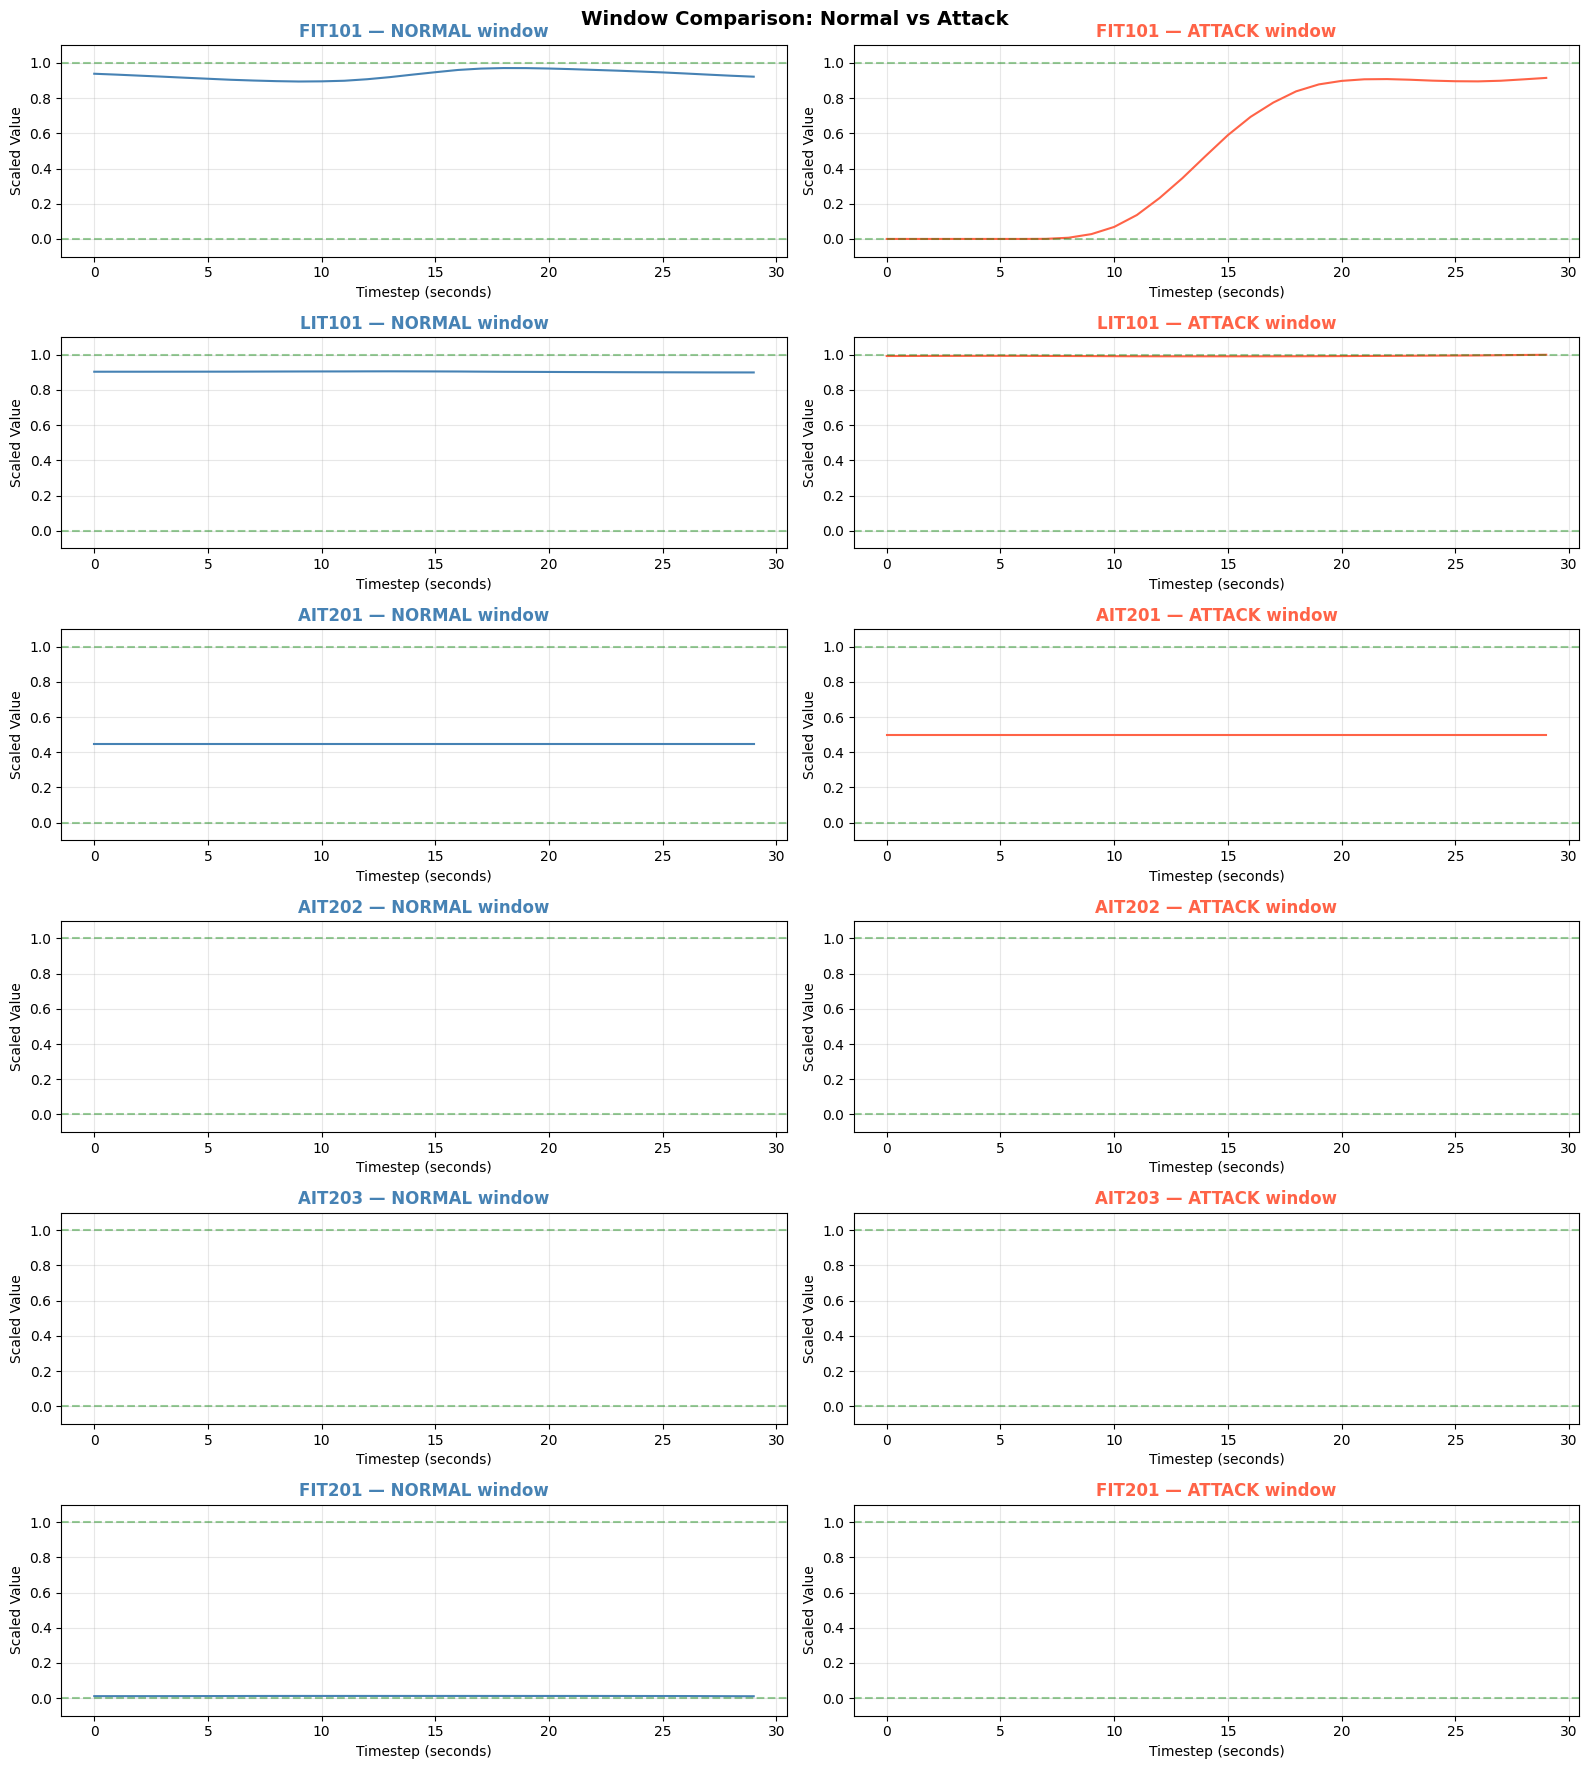

In [12]:
def plot_window_comparison(X_normal, X_attack, y_attack,
                           feature_names, n_sensors=4, normal_idx=1000):
    """
    Plots a normal window vs an attack window side by side
    for the first n_sensors features.
    """
    # Get one normal and one attack window
    # normal_idx is now passed as an argument
    attack_idx = np.where(y_attack == 1)[0][0]

    fig, axes = plt.subplots(n_sensors, 2, figsize=(16, n_sensors * 3))
    fig.suptitle('Window Comparison: Normal vs Attack',
                 fontsize=14, fontweight='bold')

    for i in range(n_sensors):
        # Normal window
        axes[i, 0].plot(
            X_normal[normal_idx, :, i],
            color='steelblue', linewidth=1.5
        )
        axes[i, 0].set_title(
            f'{feature_names[i]} — NORMAL window',
            fontweight='bold', color='steelblue'
        )
        axes[i, 0].set_xlabel('Timestep (seconds)')
        axes[i, 0].set_ylabel('Scaled Value')
        axes[i, 0].set_ylim(-0.1, 1.1)
        axes[i, 0].axhline(y=0, color='green',
                            linestyle='--', alpha=0.4)
        axes[i, 0].axhline(y=1, color='green',
                            linestyle='--', alpha=0.4)
        axes[i, 0].grid(True, alpha=0.3)

        # Attack window
        axes[i, 1].plot(
            X_attack[attack_idx, :, i],
            color='tomato', linewidth=1.5
        )
        axes[i, 1].set_title(
            f'{feature_names[i]} — ATTACK window',
            fontweight='bold', color='tomato'
        )
        axes[i, 1].set_xlabel('Timestep (seconds)')
        axes[i, 1].set_ylabel('Scaled Value')
        axes[i, 1].set_ylim(-0.1, 1.1)
        axes[i, 1].axhline(y=0, color='green',
                            linestyle='--', alpha=0.4)
        axes[i, 1].axhline(y=1, color='green',
                            linestyle='--', alpha=0.4)
        axes[i, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('window_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

plot_window_comparison(
    X_normal, X_attack, y_attack,
    feature_names=all_feature_cols,
    n_sensors=6
)

## Diagnose the Root Cause

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── Check 1: Raw statistics for AIT202 and AIT203 ─────────
problem_sensors = ['AIT202', 'AIT203']

print("── Raw Statistics in Normal Data ────────────────────────")
for col in problem_sensors:
    series = normal_final[col]
    print(f"\n  {col}:")
    print(f"    Min    : {series.min():.6f}")
    print(f"    Max    : {series.max():.6f}")
    print(f"    Mean   : {series.mean():.6f}")
    print(f"    Std    : {series.std():.6f}")
    print(f"    Zeros  : {(series == 0).sum():,} rows "
          f"({(series == 0).mean()*100:.1f}%)")
    print(f"    Unique : {series.nunique()} unique values")

# ── Check 2: Look at the entire time series for these sensors
print("\n── Value Distribution ───────────────────────────────────")
for col in problem_sensors:
    print(f"\n  {col} value counts (top 10):")
    print(normal_final[col].value_counts().head(10))

## Confirm the Flat-Line Is Consecutive

In [ ]:
# ── Check if repeated values are consecutive blocks ───────
print("── Flat-line Consecutiveness Analysis ───────────────────")

for col in ['AIT202', 'AIT203']:
    series = normal_final[col]
    max_val = series.value_counts().index[0]

    # Find where the max value occurs
    is_max = (series == max_val)

    # Count consecutive runs of the max value
    # A "run" = consecutive True values
    runs = []
    run_len = 0
    for val in is_max:
        if val:
            run_len += 1
        else:
            if run_len > 0:
                runs.append(run_len)
                run_len = 0
    if run_len > 0:
        runs.append(run_len)

    runs = sorted(runs, reverse=True)

    print(f"\n  {col} — value {max_val:.4f} repeats:")
    print(f"    Total occurrences : {is_max.sum():,}")
    print(f"    Number of runs    : {len(runs)}")
    print(f"    Longest run       : {runs[0]:,} consecutive seconds")
    print(f"    Top 5 run lengths : {runs[:5]}")

    if runs[0] > 100:
        print(f"    ✗ CONFIRMED: Long flat-line block detected")
        print(f"      This is sensor saturation in raw SWaT data")
    else:
        print(f"    ✓ Values are scattered — not a flat-line issue")

## Visualize the Flat-Line Periods

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
fig.suptitle('AIT202 and AIT203 — Flat-line Detection',
             fontsize=14, fontweight='bold')

for i, col in enumerate(['AIT202', 'AIT203']):
    series = normal_final[col]
    max_val = series.value_counts().index[0]
    is_max  = (series == max_val).values

    # Plot full time series
    axes[i].plot(
        series.values,
        color='steelblue', linewidth=0.5,
        alpha=0.7, label=f'{col} scaled value'
    )

    # Highlight flat-line periods in red
    axes[i].fill_between(
        range(len(series)),
        series.min(), series.max(),
        where=is_max,
        color='tomato', alpha=0.4,
        label=f'Stuck at {max_val:.3f}'
    )

    axes[i].set_title(
        f'{col} — Red = sensor stuck at {max_val:.4f}',
        fontweight='bold'
    )
    axes[i].set_xlabel('Time (seconds from start of normal data)')
    axes[i].set_ylabel('Scaled Value')
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)

    # Annotate percentage
    stuck_pct = is_max.mean() * 100
    axes[i].annotate(
        f'{stuck_pct:.1f}% of time stuck at max',
        xy=(0.02, 0.95), xycoords='axes fraction',
        fontsize=10, verticalalignment='top',
        color='tomato', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

plt.tight_layout()
plt.savefig('flatline_detection.png', dpi=150, bbox_inches='tight')
plt.show()


##  Fix: Clip the flat-line values

In [ ]:
def fix_flatline_saturation(df, cols, percentile_cap=99):
    """
    Caps sensor saturation flat-lines at a given percentile
    of the non-saturated readings.

    Logic:
      1. Find the stuck value (most frequent value)
      2. Calculate cap from non-stuck readings
      3. Replace stuck readings with the cap
    """
    df_fixed = df.copy()

    for col in cols:
        series = df[col]
        stuck_val = series.value_counts().index[0]
        stuck_count = (series == stuck_val).sum()

        # Only fix if it's a real flat-line (>100 consecutive occurrences)
        if stuck_count < 100:
            print(f"  {col}: skipped (stuck count={stuck_count} < 100)")
            continue

        # Calculate cap from non-stuck values only
        non_stuck = series[series != stuck_val]
        cap_value = non_stuck.quantile(percentile_cap / 100)

        # Replace stuck values
        df_fixed[col] = series.where(series != stuck_val, cap_value)

        print(f"  {col}:")
        print(f"    Stuck value    : {stuck_val:.4f} "
              f"({stuck_count:,} occurrences)")
        print(f"    Replaced with  : {cap_value:.4f} "
              f"(p{percentile_cap} of non-stuck values)")
        print(f"    New range      : [{df_fixed[col].min():.4f}, "
              f"{df_fixed[col].max():.4f}]")

    return df_fixed

# print("── Applying flat-line fix ────────────────────────────────")
# normal_final  = fix_flatline_saturation(
#     normal_final,  ['AIT202', 'AIT203','FIT301']
# )
# attack_final  = fix_flatline_saturation(
#     attack_final,  ['AIT202', 'AIT203', 'FIT301']
# )

In [ ]:
col_idx_202 = all_feature_cols.index('AIT202')
col_idx_203 = all_feature_cols.index('AIT203')

# Find windows where BOTH sensors are actually active
active_windows = []
for i in range(len(X_normal)):
    val_202 = X_normal[i, :, col_idx_202].mean()
    val_203 = X_normal[i, :, col_idx_203].mean()
    if abs(val_202) > 0.1 and abs(val_203) > 0.1:
        active_windows.append(i)

print(f"Windows where AIT202+AIT203 are active: {len(active_windows):,}")
print(f"First active window index: {active_windows[0]}")

# Now re-run the window comparison plot with this index
plot_window_comparison(
    X_normal, X_attack, y_attack,
    feature_names=all_feature_cols,
    n_sensors=8,
    normal_idx=active_windows[0]   # use active window
)


## Plot the Full Time Series

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('AIT202 and AIT203 — Full Time Series Investigation',
             fontsize=14, fontweight='bold')

for i, col in enumerate(problem_sensors):
    # ── Full normal data ──────────────────────────────────
    axes[i, 0].plot(
        normal_final[col].values,
        color='steelblue', linewidth=0.5, alpha=0.8
    )
    axes[i, 0].set_title(f'{col} — Full Normal Data ({len(normal_final):,} seconds)',
                          fontweight='bold')
    axes[i, 0].set_xlabel('Time (seconds)')
    axes[i, 0].set_ylabel('Scaled Value')
    axes[i, 0].grid(True, alpha=0.3)

    # Add statistics annotation
    mean_val = normal_final[col].mean()
    std_val  = normal_final[col].std()
    axes[i, 0].annotate(
        f'mean={mean_val:.4f}\nstd={std_val:.6f}',
        xy=(0.02, 0.95), xycoords='axes fraction',
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    )

    # ── Full attack data ──────────────────────────────────
    # Color by label — red=attack, blue=normal
    ax = axes[i, 1]
    normal_mask = attack_final['label'] == 0
    attack_mask = attack_final['label'] == 1

    ax.plot(
        np.where(normal_mask, attack_final[col].values, np.nan),
        color='steelblue', linewidth=0.5, alpha=0.8, label='Normal'
    )
    ax.plot(
        np.where(attack_mask, attack_final[col].values, np.nan),
        color='tomato', linewidth=0.8, alpha=0.9, label='Attack'
    )
    ax.set_title(f'{col} — Full Attack Data (colored by label)',
                  fontweight='bold')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Scaled Value')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('AIT202_AIT203_investigation.png', dpi=150, bbox_inches='tight')
plt.show()

## Check the Raw (Pre-Normalization) Values

In [ ]:
# # ── Load original unscaled data to compare ─────────────────
# normal_raw = pd.read_csv(
#     'SWaT_Dataset_Normal_v1.csv', low_memory=False
# )
# normal_raw.columns = normal_raw.columns.str.strip()
# normal_raw['Timestamp'] = pd.to_datetime(normal_raw['Timestamp'])
# normal_raw.set_index('Timestamp', inplace=True)

print("── RAW (unscaled) values for problem sensors ────────────")
for col in problem_sensors:
    if col in df_normal_22_28.columns:
        series = df_normal_22_28[col]
        print(f"\n  {col} RAW:")
        print(f"    Min    : {pd.to_numeric(series, errors='coerce').min():.4f}")
        print(f"    Max    : {pd.to_numeric(series, errors='coerce').max():.4f}")
        print(f"    Mean   : {pd.to_numeric(series, errors='coerce').mean():.4f}")
        print(f"    Std    : {pd.to_numeric(series, errors='coerce').std():.4f}")
        print(f"    Sample values: {series.head(10).tolist()}")

In [ ]:
# Find windows where AIT202 is actually active
col_idx = all_feature_cols.index('AIT202')

active_normal_windows = []
for i in range(len(X_normal)):
    window_mean = X_normal[i, :, col_idx].mean()
    if window_mean > 0.01:   # sensor actually reading something
        active_normal_windows.append(i)

print(f"Windows where AIT202 is active: {len(active_normal_windows)}")

if active_normal_windows:
    # Re-plot using an active window
    active_idx = active_normal_windows[0]
    print(f"First active window index: {active_idx}")

    # Re-run the comparison plot with this index
    plot_window_comparison(
        X_normal, X_attack, y_attack,
        feature_names=all_feature_cols,
        n_sensors=4,
        normal_idx=active_idx   # use active window
    )

## Save Windows to Disk

## make the Colab crash __RAM__

In [ ]:
# os.makedirs('swat_windows', exist_ok=True)

# # ── Save as numpy arrays ──────────────────────────────────
# np.save('swat_windows/X_normal.npy', X_normal)
# np.save('swat_windows/y_normal.npy', y_normal)
# np.save('swat_windows/X_attack.npy', X_attack)
# np.save('swat_windows/y_attack.npy', y_attack)

# # ── Save window configuration ─────────────────────────────
# window_config = {
#     'window_size'    : WINDOW_SIZE,
#     'stride_train'   : STRIDE_TRAIN,
#     'stride_test'    : STRIDE_TEST,
#     'label_strategy' : 'any',
#     'n_features'     : len(all_feature_cols),
#     'n_normal_windows': len(X_normal),
#     'n_attack_windows': len(X_attack),
#     'attack_window_pct': float(y_attack.mean() * 100)
# }
# with open('swat_windows/window_config.json', 'w') as f:
#     json.dump(window_config, f, indent=2)

# print("✓ Saved:")
# print(f"  X_normal.npy  : {X_normal.shape}  "
#       f"({X_normal.nbytes / 1e6:.1f} MB)")
# print(f"  y_normal.npy  : {y_normal.shape}")
# print(f"  X_attack.npy  : {X_attack.shape}  "
#       f"({X_attack.nbytes / 1e6:.1f} MB)")
# print(f"  y_attack.npy  : {y_attack.shape}")
# print(f"  window_config.json")

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Copy the swat_windows folder to the DepiProject Google Drive folder

# !cp -r swat_windows /content/drive/MyDrive/DepiPrpject/swat_windows

## Save During Window Creation

In [16]:
import numpy as np
import os
import json
import gc
import psutil

def create_and_save_windows(data, labels, save_path,
                             window_size=30, stride=1,
                             label_strategy='any',
                             batch_size=10000):
    """
    Creates windows in batches and saves directly to disk.
    Never holds the full window array in RAM.

    Saves as a memory-mapped .npy file that can be loaded
    back with np.load(..., mmap_mode='r') for RAM-efficient
    model training later.

    Parameters:
    ───────────
    data        : numpy array (n_timesteps, n_features)
    labels      : numpy array (n_timesteps,)
    save_path   : path to save .npy file (without extension)
    window_size : timesteps per window
    stride      : step between windows
    batch_size  : windows to process at once
    """
    n_samples  = len(data)
    n_features = data.shape[1]

    # ── Calculate total windows upfront ───────────────────
    n_windows = (n_samples - window_size) // stride

    print(f"  Total windows to create : {n_windows:,}")
    print(f"  Window shape            : ({window_size}, {n_features})")
    print(f"  Processing batch size   : {batch_size:,}")

    # ── Estimated file size ───────────────────────────────
    size_gb = (n_windows * window_size * n_features * 4) / 1e9
    print(f"  Estimated file size     : {size_gb:.2f} GB")

    # ── Create memory-mapped file on disk ─────────────────
    # This allocates space on disk without using RAM
    X_path = f"{save_path}_X.npy"
    y_path = f"{save_path}_y.npy"

    X_mmap = np.lib.format.open_memmap(
        X_path,
        mode='w+',
        dtype=np.float32,
        shape=(n_windows, window_size, n_features)
    )
    y_mmap = np.lib.format.open_memmap(
        y_path,
        mode='w+',
        dtype=np.int8,
        shape=(n_windows,)
    )

    # ── Fill in batches ───────────────────────────────────
    n_batches   = int(np.ceil(n_windows / batch_size))
    written     = 0

    for b in range(n_batches):
        batch_start  = b * batch_size
        batch_end    = min(batch_start + batch_size, n_windows)
        batch_n      = batch_end - batch_start

        # Pre-allocate batch arrays
        X_batch = np.zeros(
            (batch_n, window_size, n_features),
            dtype=np.float32
        )
        y_batch = np.zeros(batch_n, dtype=np.int8)

        # Fill batch
        for i in range(batch_n):
            ts_start = (batch_start + i) * stride
            ts_end   = ts_start + window_size

            X_batch[i] = data[ts_start:ts_end]

            window_labels = labels[ts_start:ts_end]
            if label_strategy == 'any':
                y_batch[i] = 1 if window_labels.max() > 0 else 0
            elif label_strategy == 'majority':
                y_batch[i] = 1 if window_labels.mean() > 0.5 else 0
            elif label_strategy == 'last':
                y_batch[i] = window_labels[-1]

        # Write batch directly to disk
        X_mmap[batch_start:batch_end] = X_batch
        y_mmap[batch_start:batch_end] = y_batch

        written += batch_n

        # Free batch from RAM immediately
        del X_batch, y_batch
        gc.collect()

        # Progress update
        if (b + 1) % 5 == 0 or b == n_batches - 1:
            ram = psutil.virtual_memory()
            print(f"    Batch {b+1:3}/{n_batches}  "
                  f"[{batch_start:>7,} → {batch_end:>7,}]  "
                  f"RAM: {ram.used/1e9:.1f}GB "
                  f"({ram.percent:.0f}%)")

    # Flush to disk
    del X_mmap, y_mmap
    gc.collect()

    print(f"  ✓ Written {written:,} windows to disk")
    print(f"  ✓ X saved → {X_path}")
    print(f"  ✓ y saved → {y_path}")

    return X_path, y_path

In [17]:
# ── Define your base path once ────────────────────────────
DRIVE_BASE = '/content/drive/MyDrive/DepiPrpject/swat_windows'
os.makedirs(DRIVE_BASE, exist_ok=True)

# ── Normal windows ────────────────────────────────────────
print("── Creating and saving NORMAL windows ───────────────────")
X_normal_path, y_normal_path = create_and_save_windows(
    data           = normal_data,
    labels         = normal_labels,
    save_path      = f'{DRIVE_BASE}/normal',
    window_size    = WINDOW_SIZE,
    stride         = STRIDE_TRAIN,
    label_strategy = 'any',
    batch_size     = 10000
)

gc.collect()

# ── Attack windows ────────────────────────────────────────
print("\n── Creating and saving ATTACK windows ───────────────────")
X_attack_path, y_attack_path = create_and_save_windows(
    data           = attack_data,
    labels         = attack_labels,
    save_path      = f'{DRIVE_BASE}/attack',
    window_size    = WINDOW_SIZE,
    stride         = STRIDE_TEST,
    label_strategy = 'any',
    batch_size     = 10000
)

gc.collect()

# ── Save window config to Drive too ───────────────────────
window_config = {
    'window_size'       : WINDOW_SIZE,
    'stride'            : STRIDE_TRAIN,
    'label_strategy'    : 'any',
    'dtype'             : 'float32',
    'n_features'        : len(all_feature_cols),
    'smoothing_applied' : True,
    'smoothing_window'  : 5,
    'paths': {
        'X_normal' : X_normal_path,
        'y_normal' : y_normal_path,
        'X_attack' : X_attack_path,
        'y_attack' : y_attack_path,
    }
}
with open(f'{DRIVE_BASE}/window_config.json', 'w') as f:
    json.dump(window_config, f, indent=2)

print(f"\n✓ All files saved to: {DRIVE_BASE}")

── Creating and saving NORMAL windows ───────────────────
  Total windows to create : 478,769
  Window shape            : (30, 71)
  Processing batch size   : 10,000
  Estimated file size     : 4.08 GB
    Batch   5/48  [ 40,000 →  50,000]  RAM: 10.8GB (82%)
    Batch  10/48  [ 90,000 → 100,000]  RAM: 10.8GB (82%)
    Batch  15/48  [140,000 → 150,000]  RAM: 10.8GB (82%)
    Batch  20/48  [190,000 → 200,000]  RAM: 10.9GB (82%)
    Batch  25/48  [240,000 → 250,000]  RAM: 10.9GB (82%)
    Batch  30/48  [290,000 → 300,000]  RAM: 10.7GB (81%)
    Batch  35/48  [340,000 → 350,000]  RAM: 10.4GB (79%)
    Batch  40/48  [390,000 → 400,000]  RAM: 10.4GB (79%)
    Batch  45/48  [440,000 → 450,000]  RAM: 10.4GB (79%)
    Batch  48/48  [470,000 → 478,769]  RAM: 10.4GB (79%)
  ✓ Written 478,769 windows to disk
  ✓ X saved → /content/drive/MyDrive/DepiPrpject/swat_windows/normal_X.npy
  ✓ y saved → /content/drive/MyDrive/DepiPrpject/swat_windows/normal_y.npy

── Creating and saving ATTACK windows ───

NameError: name 'STRIDE' is not defined

In [19]:
# !cp -r swat_windows /content/drive/MyDrive/DepiPrpject/swat_windows

# Feature Engineering

##  Load windows

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import json

# ── Load windows saved ─────────────────────────
print("Loading saved windows...")

X_normal = np.load('/content/drive/MyDrive/DepiPrpject/swat_windows/normal_X.npy')
y_normal = np.load('/content/drive/MyDrive/DepiPrpject/swat_windows/normal_y.npy')
X_attack = np.load('/content/drive/MyDrive/DepiPrpject/swat_windows/attack_X.npy')
y_attack = np.load('/content/drive/MyDrive/DepiPrpject/swat_windows/attack_y.npy')

# ── Load feature config saved ──────────────────
with open('swat_preprocessed/feature_config.json', 'r') as f:
    feature_config = json.load(f)

all_feature_cols      = feature_config['all_feature_cols']
sensor_cols           = feature_config['sensor_cols']
encoded_actuator_cols = feature_config['encoded_actuator_cols']

# ── Load window config saved ───────────────────
with open('/content/drive/MyDrive/DepiPrpject/swat_windows/window_config.json', 'r') as f:
    window_config = json.load(f)

# ── Confirm everything loaded correctly ───────────────────
print(f"X_normal shape  : {X_normal.shape}")
print(f"y_normal shape  : {y_normal.shape}")
print(f"X_attack shape  : {X_attack.shape}")
print(f"y_attack shape  : {y_attack.shape}")
print(f"Features        : {len(all_feature_cols)}")
print(f"Window size     : {window_config['window_size']} seconds")
print(f"\nLabel check:")
print(f"  y_normal all zeros : {(y_normal == 0).all()}")
print(f"  y_attack attack %  : {y_attack.mean()*100:.1f}%")

Loading saved windows...
X_normal shape  : (478769, 30, 71)
y_normal shape  : (478769,)
X_attack shape  : (449924, 30, 71)
y_attack shape  : (449924,)
Features        : 71
Window size     : 30 seconds

Label check:
  y_normal all zeros : True
  y_attack attack %  : 12.4%


## Category 1: Statistical Window Features

In [2]:
import numpy as np
import pandas as pd
from scipy import stats


def extract_statistical_batched(X, feature_names,
                                  batch_size=5000):
    """
    Extracts per-window statistical features in batches.

    Features per sensor (9 total):
      mean, std, min, max, range,
      median, skewness, kurtosis, energy

    Input  : (n_windows, window_size, n_features)
    Output : (n_windows, n_features × 9)
    """
    n_windows, window_size, n_features = X.shape
    n_batches = int(np.ceil(n_windows / batch_size))
    col_names = []
    results   = []

    # Build column names once
    for fname in feature_names:
        col_names.extend([
            f'{fname}_mean',   f'{fname}_std',
            f'{fname}_min',    f'{fname}_max',
            f'{fname}_range',
            f'{fname}_kurt',
            # f'{fname}_energy'
        ])

    print(f"  Statistical features: {len(col_names)} columns")
    print(f"  Processing {n_windows:,} windows "
          f"in {n_batches} batches of {batch_size:,}...")

    for b in range(n_batches):
        start   = b * batch_size
        end     = min(start + batch_size, n_windows)
        X_batch = X[start:end]         # (batch, window, features)

        batch_cols = []

        for f_idx in range(n_features):
            sw = X_batch[:, :, f_idx]  # (batch, window_size)

            mean_   = sw.mean(axis=1)
            std_    = sw.std(axis=1)
            min_    = sw.min(axis=1)
            max_    = sw.max(axis=1)
            range_  = max_ - min_
            # median_ = np.median(sw, axis=1)
            # skew_   = stats.skew(sw, axis=1)
            kurt_   = stats.kurtosis(sw, axis=1)
            # energy_ = (sw ** 2).mean(axis=1)

            batch_cols.extend([
                mean_, std_, min_, max_,
                range_, kurt_
            ])

        batch_result = np.column_stack(batch_cols).astype(np.float32)
        results.append(batch_result)

        # Free batch memory immediately
        del X_batch, batch_cols, batch_result
        # gc.collect()

        # Progress every 10 batches
        if (b + 1) % 10 == 0 or b == n_batches - 1:
            print(f"    Batch {b+1:3}/{n_batches} done  "
                  f"[{start:>7,} → {end:>7,}]")

    combined = np.vstack(results)
    del results
    # gc.collect()

    print(f"  ✓ Statistical features shape: {combined.shape}")
    return combined, col_names


# # Apply to your windows
# stat_features_normal, stat_col_names = extract_statistical_features(
#     X_normal, all_feature_cols
# )
# stat_features_attack, _ = extract_statistical_features(
#     X_attack, all_feature_cols
# )

# print(f"Original window shape    : {X_normal.shape}")
# print(f"Statistical features     : {stat_features_normal.shape}")

## Category 2: Temporal/Rate-of-Change Features

In [3]:
import numpy as np
import os
from scipy import stats


def extract_temporal_batched(X, feature_names,
                               batch_size=3000):
    """
    Extracts rate-of-change temporal features in batches.

    Features per sensor (6 total):
      mean_velocity    : average rate of change per window
      max_velocity     : peak rate of change (spike detector)
      std_velocity     : how irregular the changes are
      max_acceleration : peak of rate-of-change of rate-of-change
      zcr              : zero crossing rate (oscillation measure)
      slope            : overall linear trend direction

    Input  : (n_windows, window_size, n_features)
    Output : (n_windows, n_features × 6)
    """
    n_windows, window_size, n_features = X.shape
    n_batches = int(np.ceil(n_windows / batch_size))
    col_names = []
    results   = []

    # Pre-compute time vector (same for every batch)
    t      = np.arange(window_size)
    t_mean = t.mean()
    t_var  = ((t - t_mean) ** 2).sum()

    # Build column names once
    for fname in feature_names:
        col_names.extend([
            f'{fname}_mean_vel',  f'{fname}_max_vel',
            f'{fname}_std_vel',   f'{fname}_max_acc',
            f'{fname}_zcr',       f'{fname}_slope'
        ])

    print(f"  Temporal features: {len(col_names)} columns")
    print(f"  Processing {n_windows:,} windows "
          f"in {n_batches} batches of {batch_size:,}...")

    for b in range(n_batches):
        start   = b * batch_size
        end     = min(start + batch_size, n_windows)
        X_batch = X[start:end]

        batch_cols = []

        for f_idx in range(n_features):
            sw = X_batch[:, :, f_idx]  # (batch, window_size)

            # ── Velocity (first difference) ───────────────
            d1               = np.diff(sw, axis=1)
            mean_velocity    = d1.mean(axis=1)
            max_velocity     = np.abs(d1).max(axis=1)
            std_velocity     = d1.std(axis=1)

            # ── Acceleration (second difference) ──────────
            d2               = np.diff(d1, axis=1)
            max_acceleration = np.abs(d2).max(axis=1)

            # ── Zero crossing rate ─────────────────────────
            centered     = sw - sw.mean(axis=1, keepdims=True)
            sign_changes = np.diff(np.sign(centered), axis=1)
            zcr          = (sign_changes != 0).sum(axis=1) / window_size

            # ── Linear trend slope (vectorized) ───────────
            x_mean = sw.mean(axis=1, keepdims=True)
            slope  = ((t - t_mean) * (sw - x_mean)).sum(axis=1) / t_var

            batch_cols.extend([
                mean_velocity, max_velocity, std_velocity,
                max_acceleration, zcr, slope
            ])

        batch_result = np.column_stack(batch_cols).astype(np.float32)
        results.append(batch_result)

        del X_batch, batch_cols, batch_result
        # gc.collect()

        if (b + 1) % 10 == 0 or b == n_batches - 1:
            print(f"    Batch {b+1:3}/{n_batches} done  "
                  f"[{start:>7,} → {end:>7,}]")

    combined = np.vstack(results)
    del results
    # gc.collect()

    print(f"  ✓ Temporal features shape: {combined.shape}")
    return combined, col_names


In [4]:
# !cp -r swat_features /content/drive/MyDrive/DepiPrpject/swat_features


In [5]:
os.makedirs('/content/drive/MyDrive/DepiPrpject/swat_features', exist_ok=True)

# ── Process Normal Data ────────────────────────────────────
print("\n══ NORMAL DATA ══════════════════════════════════════════")

print("\n[1/2] Statistical features...")
stat_normal, stat_col_names = extract_statistical_batched(
    X_normal, all_feature_cols, batch_size=5000
)

print("\n[2/2] Temporal features...")
temporal_normal, temporal_col_names = extract_temporal_batched(
    X_normal, all_feature_cols, batch_size=3000
)

# ── Process Attack Data ────────────────────────────────────
print("\n══ ATTACK DATA ══════════════════════════════════════════")

print("\n[1/2] Statistical features...")
stat_attack, _ = extract_statistical_batched(
    X_attack, all_feature_cols, batch_size=5000
)

print("\n[2/2] Temporal features...")
temporal_attack, _ = extract_temporal_batched(
    X_attack, all_feature_cols, batch_size=3000
)


══ NORMAL DATA ══════════════════════════════════════════

[1/2] Statistical features...
  Statistical features: 426 columns
  Processing 478,769 windows in 96 batches of 5,000...


/tmp/ipython-input-820301679.py:54: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt_   = stats.kurtosis(sw, axis=1)


    Batch  10/96 done  [ 45,000 →  50,000]
    Batch  20/96 done  [ 95,000 → 100,000]
    Batch  30/96 done  [145,000 → 150,000]
    Batch  40/96 done  [195,000 → 200,000]
    Batch  50/96 done  [245,000 → 250,000]
    Batch  60/96 done  [295,000 → 300,000]
    Batch  70/96 done  [345,000 → 350,000]
    Batch  80/96 done  [395,000 → 400,000]
    Batch  90/96 done  [445,000 → 450,000]
    Batch  96/96 done  [475,000 → 478,769]
  ✓ Statistical features shape: (478769, 426)

[2/2] Temporal features...
  Temporal features: 426 columns
  Processing 478,769 windows in 160 batches of 3,000...
    Batch  10/160 done  [ 27,000 →  30,000]
    Batch  20/160 done  [ 57,000 →  60,000]
    Batch  30/160 done  [ 87,000 →  90,000]
    Batch  40/160 done  [117,000 → 120,000]
    Batch  50/160 done  [147,000 → 150,000]
    Batch  60/160 done  [177,000 → 180,000]
    Batch  70/160 done  [207,000 → 210,000]
    Batch  80/160 done  [237,000 → 240,000]
    Batch  90/160 done  [267,000 → 270,000]
    Batch 1

In [6]:
import numpy as np
import os
import gc
import json
import psutil

DRIVE_BASE = '/content/drive/MyDrive/DepiPrpject'
os.makedirs(f'{DRIVE_BASE}/swat_features', exist_ok=True)

def combine_and_save_batched(stat_path, temporal_path,
                              save_path, batch_size=20000):
    """
    Combines statistical and temporal features in batches
    and saves directly to disk.

    Never holds the full combined array in RAM.
    Loads each source array in chunks, combines chunk by chunk,
    writes chunk to disk immediately then frees RAM.

    Parameters:
    ───────────
    stat_path     : path to saved statistical features .npy
    temporal_path : path to saved temporal features .npy
    save_path     : output path for combined flat features .npy
    batch_size    : rows to combine at once
    """
    # ── Load arrays in memory-map mode ────────────────────
    # mmap_mode='r' reads from disk without loading to RAM
    print(f"  Loading arrays in memory-map mode...")
    stat     = np.load(stat_path,     mmap_mode='r')
    temporal = np.load(temporal_path, mmap_mode='r')

    n_windows   = stat.shape[0]
    n_stat      = stat.shape[1]
    n_temporal  = temporal.shape[1]
    n_combined  = n_stat + n_temporal
    n_batches   = int(np.ceil(n_windows / batch_size))

    print(f"  Windows          : {n_windows:,}")
    print(f"  Stat columns     : {n_stat:,}")
    print(f"  Temporal columns : {n_temporal:,}")
    print(f"  Combined columns : {n_combined:,}")
    print(f"  Batches          : {n_batches}")

    size_gb = (n_windows * n_combined * 4) / 1e9
    print(f"  Output file size : {size_gb:.2f} GB")

    # ── Create memory-mapped output file on disk ──────────
    output = np.lib.format.open_memmap(
        save_path,
        mode='w+',
        dtype=np.float32,
        shape=(n_windows, n_combined)
    )

    # ── Process in batches ────────────────────────────────
    for b in range(n_batches):
        start = b * batch_size
        end   = min(start + batch_size, n_windows)

        # Load only this batch from each source
        stat_batch     = np.array(stat[start:end],
                                   dtype=np.float32)
        temporal_batch = np.array(temporal[start:end],
                                   dtype=np.float32)

        # Combine this batch
        combined_batch = np.hstack([stat_batch,
                                     temporal_batch])

        # Clean NaN/Inf in this batch only
        combined_batch = np.nan_to_num(
            combined_batch,
            nan=0.0, posinf=1.0, neginf=-1.0
        )

        # Write to disk immediately
        output[start:end] = combined_batch

        # Free batch RAM
        del stat_batch, temporal_batch, combined_batch
        gc.collect()

        # Progress
        if (b + 1) % 5 == 0 or b == n_batches - 1:
            ram = psutil.virtual_memory()
            print(f"    Batch {b+1:3}/{n_batches}  "
                  f"[{start:>7,} → {end:>7,}]  "
                  f"RAM: {ram.used/1e9:.1f}GB "
                  f"({ram.percent:.0f}%)")

    # Flush and close
    del output, stat, temporal
    gc.collect()

    print(f"  ✓ Saved → {save_path}")
    return save_path


In [7]:
# ════════════════════════════════════════════════════════════
# STEP 1: Save stat and temporal arrays individually first
# (if they are still in RAM from previous steps)
# ════════════════════════════════════════════════════════════

FEAT_BASE = f'{DRIVE_BASE}/swat_features'

# ── Save stat features then free RAM ─────────────────────
print("── Saving statistical features ──────────────────────────")
stat_normal_path = f'{FEAT_BASE}/stat_normal.npy'
stat_attack_path = f'{FEAT_BASE}/stat_attack.npy'

np.save(stat_normal_path, stat_normal)
print(f"  ✓ stat_normal saved  ({stat_normal.nbytes/1e9:.2f} GB)")
del stat_normal
gc.collect()

np.save(stat_attack_path, stat_attack)
print(f"  ✓ stat_attack saved  ({stat_attack.nbytes/1e9:.2f} GB)")
del stat_attack
gc.collect()

# ── Save temporal features then free RAM ──────────────────
print("\n── Saving temporal features ─────────────────────────────")
temp_normal_path = f'{FEAT_BASE}/temporal_normal.npy'
temp_attack_path = f'{FEAT_BASE}/temporal_attack.npy'

np.save(temp_normal_path, temporal_normal)
print(f"  ✓ temporal_normal saved  ({temporal_normal.nbytes/1e9:.2f} GB)")
del temporal_normal
gc.collect()

np.save(temp_attack_path, temporal_attack)
print(f"  ✓ temporal_attack saved  ({temporal_attack.nbytes/1e9:.2f} GB)")
del temporal_attack
gc.collect()


── Saving statistical features ──────────────────────────
  ✓ stat_normal saved  (0.82 GB)
  ✓ stat_attack saved  (0.77 GB)

── Saving temporal features ─────────────────────────────
  ✓ temporal_normal saved  (0.82 GB)
  ✓ temporal_attack saved  (0.77 GB)


0

In [8]:
# ════════════════════════════════════════════════════════════
# STEP 2: Combine and save flat features from disk
# ════════════════════════════════════════════════════════════

print("\n── Combining NORMAL flat features ───────────────────────")
X_normal_flat_path = f'{FEAT_BASE}/X_normal_flat.npy'
combine_and_save_batched(
    stat_path     = stat_normal_path,
    temporal_path = temp_normal_path,
    save_path     = X_normal_flat_path,
    batch_size    = 20000
)

gc.collect()

print("\n── Combining ATTACK flat features ───────────────────────")
X_attack_flat_path = f'{FEAT_BASE}/X_attack_flat.npy'
combine_and_save_batched(
    stat_path     = stat_attack_path,
    temporal_path = temp_attack_path,
    save_path     = X_attack_flat_path,
    batch_size    = 20000
)

gc.collect()



── Combining NORMAL flat features ───────────────────────
  Loading arrays in memory-map mode...
  Windows          : 478,769
  Stat columns     : 426
  Temporal columns : 426
  Combined columns : 852
  Batches          : 24
  Output file size : 1.63 GB
    Batch   5/24  [ 80,000 → 100,000]  RAM: 9.0GB (68%)
    Batch  10/24  [180,000 → 200,000]  RAM: 9.0GB (68%)
    Batch  15/24  [280,000 → 300,000]  RAM: 9.0GB (69%)
    Batch  20/24  [380,000 → 400,000]  RAM: 9.0GB (69%)
    Batch  24/24  [460,000 → 478,769]  RAM: 8.9GB (68%)
  ✓ Saved → /content/drive/MyDrive/DepiPrpject/swat_features/X_normal_flat.npy

── Combining ATTACK flat features ───────────────────────
  Loading arrays in memory-map mode...
  Windows          : 449,924
  Stat columns     : 426
  Temporal columns : 426
  Combined columns : 852
  Batches          : 23
  Output file size : 1.53 GB
    Batch   5/23  [ 80,000 → 100,000]  RAM: 8.9GB (68%)
    Batch  10/23  [180,000 → 200,000]  RAM: 8.9GB (68%)
    Batch  15/23  [

0

In [9]:
# ════════════════════════════════════════════════════════════
# STEP 3: Save labels and feature registry
# ════════════════════════════════════════════════════════════

print("\n── Saving labels and registry ───────────────────────────")

# Labels are tiny — save normally
np.save(f'{FEAT_BASE}/y_normal.npy', y_normal)
np.save(f'{FEAT_BASE}/y_attack.npy', y_attack)
print("  ✓ y_normal.npy")
print("  ✓ y_attack.npy")

# Feature registry
feature_registry = {
    'statistical_cols' : stat_col_names,
    'temporal_cols'    : temporal_col_names,
    'flat_2d_cols'     : stat_col_names + temporal_col_names,
    'feature_counts': {
        'statistical' : len(stat_col_names),
        'temporal'    : len(temporal_col_names),
        'flat_total'  : len(stat_col_names) + len(temporal_col_names)
    },
    'paths': {
        'X_normal_flat' : X_normal_flat_path,
        'X_attack_flat' : X_attack_flat_path,
        'y_normal'      : f'{FEAT_BASE}/y_normal.npy',
        'y_attack'      : f'{FEAT_BASE}/y_attack.npy',
    }
}
with open(f'{FEAT_BASE}/feature_registry.json', 'w') as f:
    json.dump(feature_registry, f, indent=2)
print("  ✓ feature_registry.json")




── Saving labels and registry ───────────────────────────
  ✓ y_normal.npy
  ✓ y_attack.npy
  ✓ feature_registry.json


In [11]:
# ════════════════════════════════════════════════════════════
# STEP 4: Verify saved files
# ════════════════════════════════════════════════════════════

print("\n══ VERIFICATION ═════════════════════════════════════════")

files_to_check = [
    X_normal_flat_path,
    X_attack_flat_path,
    f'{FEAT_BASE}/y_normal.npy',
    f'{FEAT_BASE}/y_attack.npy',
]

for path in files_to_check:
    if os.path.exists(path):
        size_gb = os.path.getsize(path) / 1e9
        # Load shape only using mmap — no RAM used
        arr = np.load(path, mmap_mode='r')
        print(f"  ✓ {os.path.basename(path):<25} "
              f"shape={str(arr.shape):<20} "
              f"size={size_gb:.2f} GB")
        del arr
    else:
        print(f"  ✗ {os.path.basename(path)} — NOT FOUND")

print(f"\n✓ All features saved to: {FEAT_BASE}")


══ VERIFICATION ═════════════════════════════════════════
  ✓ X_normal_flat.npy         shape=(478769, 852)        size=1.63 GB
  ✓ X_attack_flat.npy         shape=(449924, 852)        size=1.53 GB
  ✓ y_normal.npy              shape=(478769,)            size=0.00 GB
  ✓ y_attack.npy              shape=(449924,)            size=0.00 GB

✓ All features saved to: /content/drive/MyDrive/DepiPrpject/swat_features


In [ ]:
print("\n══ SAVING ═══════════════════════════════════════════════")

# ── 3D windows (for LSTM / Autoencoder) ───────────────────
np.save('swat_features/X_normal_3d.npy', X_normal)
np.save('swat_features/X_attack_3d.npy', X_attack)
print("  ✓ X_normal_3d.npy")
print("  ✓ X_attack_3d.npy")

# ── Flat 2D features (for Isolation Forest) ───────────────
np.save('swat_features/X_normal_flat.npy', X_normal_flat)
np.save('swat_features/X_attack_flat.npy', X_attack_flat)
print("  ✓ X_normal_flat.npy")
print("  ✓ X_attack_flat.npy")

# ── Labels ─────────────────────────────────────────────────
np.save('swat_features/y_normal.npy', y_normal)
np.save('swat_features/y_attack.npy', y_attack)
print("  ✓ y_normal.npy")
print("  ✓ y_attack.npy")

# ── Feature registry ──────────────────────────────────────
feature_registry = {
    'raw_3d_cols'      : all_feature_cols,
    'statistical_cols' : stat_col_names,
    'temporal_cols'    : temporal_col_names,
    'flat_2d_cols'     : all_flat_cols,
    'shapes': {
        'X_normal_3d'  : list(X_normal.shape),
        'X_attack_3d'  : list(X_attack.shape),
        'X_normal_flat': list(X_normal_flat.shape),
        'X_attack_flat': list(X_attack_flat.shape),
    },
    'feature_counts': {
        'raw_per_window'        : len(all_feature_cols),
        'statistical_total'     : len(stat_col_names),
        'temporal_total'        : len(temporal_col_names),
        'flat_total'            : len(all_flat_cols),
    }
}
with open('swat_features/feature_registry.json', 'w') as f:
    json.dump(feature_registry, f, indent=2)
print("  ✓ feature_registry.json")

## Category 3: Cross-Sensor Correlation Features

In [ ]:
# def extract_correlation_features(X, sensor_groups):
#     """
#     Computes pairwise correlations between sensors
#     within each physical stage.

#     A sudden drop in correlation between normally-coupled
#     sensors is a strong anomaly signal.

#     sensor_groups: dict of {stage_name: [sensor_indices]}
#     """
#     n_windows = X.shape[0]
#     feature_list = []
#     col_names = []

#     print("Extracting cross-sensor correlation features...")

#     for stage_name, sensor_indices in sensor_groups.items():
#         if len(sensor_indices) < 2:
#             continue

#         # Get all pairs within this stage
#         for i in range(len(sensor_indices)):
#             for j in range(i + 1, len(sensor_indices)):
#                 idx_i = sensor_indices[i]
#                 idx_j = sensor_indices[j]

#                 s1 = X[:, :, idx_i]  # (n_windows, window_size)
#                 s2 = X[:, :, idx_j]  # (n_windows, window_size)

#                 # Pearson correlation for each window
#                 correlations = []
#                 for w in range(n_windows):
#                     # Handle constant windows (std=0)
#                     if s1[w].std() < 1e-8 or s2[w].std() < 1e-8:
#                         correlations.append(0.0)
#                     else:
#                         corr = np.corrcoef(s1[w], s2[w])[0, 1]
#                         correlations.append(corr)

#                 feature_list.append(np.array(correlations))

#                 fname_i = all_feature_cols[idx_i]
#                 fname_j = all_feature_cols[idx_j]
#                 col_names.append(
#                     f'corr_{stage_name}_{fname_i}_{fname_j}'
#                 )

#     result = np.column_stack(feature_list) if feature_list else np.array([])
#     print(f"  Correlation features shape: {result.shape}")
#     return result, col_names


# # ── Define which sensors belong to which physical stage ───
# # Using indices from all_feature_cols list
# def get_stage_sensor_indices(all_feature_cols):
#     stage_groups = {
#         'P1': [i for i, c in enumerate(all_feature_cols)
#                if c in ['FIT101', 'LIT101']],
#         'P2': [i for i, c in enumerate(all_feature_cols)
#                if c in ['AIT201', 'AIT202', 'AIT203', 'FIT201']],
#         'P3': [i for i, c in enumerate(all_feature_cols)
#                if c in ['DPIT301', 'FIT301', 'LIT301']],
#         'P4': [i for i, c in enumerate(all_feature_cols)
#                if c in ['AIT401', 'AIT402', 'FIT401', 'LIT401']],
#         'P5': [i for i, c in enumerate(all_feature_cols)
#                if c in ['AIT501', 'AIT502', 'AIT503', 'AIT504',
#                         'FIT501', 'FIT502', 'FIT503', 'FIT504',
#                         'PIT501', 'PIT502', 'PIT503']],
#         'P6': [i for i, c in enumerate(all_feature_cols)
#                if c in ['FIT601']]
#     }
#     return stage_groups

# stage_groups = get_stage_sensor_indices(all_feature_cols)

# # Note: correlation is computationally expensive
# # Run on a sample first to check performance
# print("Computing correlations on sample of 5000 windows...")
# sample_size = 5000
# corr_features_normal, corr_col_names = extract_correlation_features(
#     X_normal[:sample_size], stage_groups
# )
# corr_features_attack, _ = extract_correlation_features(
#     X_attack[:sample_size], stage_groups
# )

## Category 4: Physics-Based Features

In [9]:
# def extract_physics_features(X, all_feature_cols):
#     """
#     Encodes known physical invariants of the SWaT water
#     treatment process. Violations of these invariants
#     are direct evidence of anomalies.

#     Physical rules encoded:
#     1. Mass balance P1: if MV101 open + P101 on → LIT101 should rise
#     2. Flow continuity: inflow and outflow should be correlated
#     3. Pressure-flow relationship in P3
#     4. UV activation rule in P4
#     """
#     n_windows, window_size, n_features = X.shape
#     feature_list = []
#     col_names = []

#     print("Extracting physics-based features...")

#     # Helper to get sensor index safely
#     def get_idx(name):
#         try:
#             return all_feature_cols.index(name)
#         except ValueError:
#             return None

#     # ── Rule 1: P1 Mass Balance ───────────────────────────
#     # LIT101 should correlate with FIT101 (inflow)
#     # When FIT101 is high, LIT101 should be rising
#     fit101_idx = get_idx('FIT101')
#     lit101_idx = get_idx('LIT101')

#     if fit101_idx and lit101_idx:
#         fit101 = X[:, :, fit101_idx]
#         lit101 = X[:, :, lit101_idx]

#         # Rate of change of LIT101 should follow FIT101
#         lit101_slope = np.diff(lit101, axis=1).mean(axis=1)
#         fit101_mean  = fit101.mean(axis=1)

#         # Mass balance violation: high inflow but level dropping
#         mass_balance_violation = np.where(
#             (fit101_mean > 0.5) & (lit101_slope < -0.01),
#             1.0, 0.0
#         )

#         feature_list.append(lit101_slope)
#         feature_list.append(mass_balance_violation)
#         col_names.extend([
#             'physics_lit101_slope',
#             'physics_p1_mass_balance_violation'
#         ])

#     # ── Rule 2: P3 Pressure-Flow Relationship ─────────────
#     # High DPIT301 (pressure drop) with low FIT301 (flow)
#     # indicates membrane blockage — an anomalous condition
#     dpit301_idx = get_idx('DPIT301')
#     fit301_idx  = get_idx('FIT301')

#     if dpit301_idx and fit301_idx:
#         dpit301 = X[:, :, dpit301_idx].mean(axis=1)
#         fit301  = X[:, :, fit301_idx].mean(axis=1)

#         # Pressure-flow ratio — spike = anomaly
#         # Avoid division by zero
#         pressure_flow_ratio = np.where(
#             fit301 > 0.01,
#             dpit301 / (fit301 + 1e-8),
#             dpit301
#         )

#         feature_list.append(pressure_flow_ratio)
#         col_names.append('physics_p3_pressure_flow_ratio')

#     # ── Rule 3: P1-P3 Level Relationship ─────────────────
#     # LIT101 and LIT301 should be inversely coupled —
#     # when P1 pumps water to P3, LIT101 drops and LIT301 rises
#     lit301_idx = get_idx('LIT301')

#     if lit101_idx and lit301_idx:
#         lit101 = X[:, :, lit101_idx].mean(axis=1)
#         lit301 = X[:, :, lit301_idx].mean(axis=1)

#         # Normally these should sum to roughly a constant
#         # Large deviations = anomaly
#         level_sum = lit101 + lit301
#         level_sum_deviation = np.abs(
#             level_sum - level_sum.mean()
#         ) / (level_sum.std() + 1e-8)

#         feature_list.append(level_sum)
#         feature_list.append(level_sum_deviation)
#         col_names.extend([
#             'physics_p1_p3_level_sum',
#             'physics_p1_p3_level_deviation'
#         ])

#     # ── Rule 4: P4 UV Activation Rule ────────────────────
#     # FIT401 should be above threshold when UV401 is active
#     fit401_idx = get_idx('FIT401')
#     uv401_s2   = get_idx('UV401_s2')  # state 2 = ON

#     if fit401_idx and uv401_s2:
#         fit401 = X[:, :, fit401_idx].mean(axis=1)
#         uv_on  = X[:, :, uv401_s2].mean(axis=1)

#         # UV on but no flow = anomaly
#         uv_flow_violation = np.where(
#             (uv_on > 0.5) & (fit401 < 0.1),
#             1.0, 0.0
#         )

#         feature_list.append(uv_flow_violation)
#         col_names.append('physics_p4_uv_flow_violation')

#     result = np.column_stack(feature_list)
#     print(f"  Physics features shape: {result.shape}")
#     return result, col_names


# physics_features_normal, physics_col_names = extract_physics_features(
#     X_normal, all_feature_cols
# )
# physics_features_attack, _ = extract_physics_features(
#     X_attack, all_feature_cols
# )

Extracting physics-based features...
  Physics features shape: (478770, 4)
Extracting physics-based features...
  Physics features shape: (449971, 4)


## Category 5: Combine All Features

In [ ]:
# def combine_all_features(X_windows, stat_feats=None,
#                           temporal_feats=None, physics_feats=None,
#                           use_raw=True):
#     """
#     Combines all feature types into a single feature matrix.

#     For Isolation Forest: use flat combined features (2D)
#     For LSTM/Autoencoder: keep raw windows (3D) or use stat (2D)
#     """
#     parts = []
#     names = []

#     if use_raw:
#         # Flatten the 3D windows to 2D
#         n_windows = X_windows.shape[0]
#         flat_windows = X_windows.reshape(n_windows, -1)
#         parts.append(flat_windows)
#         names.extend([
#             f'raw_{f}_t{t}'
#             for f in all_feature_cols
#             for t in range(X_windows.shape[1])
#         ])

#     if stat_feats is not None:
#         parts.append(stat_feats)
#         names.extend(stat_col_names)

#     if temporal_feats is not None:
#         parts.append(temporal_feats)
#         names.extend(temporal_col_names)

#     if physics_feats is not None:
#         parts.append(physics_feats)
#         names.extend(physics_col_names)

#     combined = np.hstack(parts)
#     return combined, names

# # ── For Isolation Forest (needs 2D flat features) ─────────
# X_normal_flat, flat_feature_names = combine_all_features(
#     X_normal,
#     # stat_features_normal,
#     temporal_normal,
#     # physics_features_normal,
#     use_raw=False   # Statistical summary only for IF
# )

# X_attack_flat, _ = combine_all_features(
#     X_attack,
#     # stat_features_attack,
#     temporal_attack,
#     # physics_features_attack,
#     use_raw=False
# )

# print(f"\n── Final Feature Shapes ──────────────────────────────────")
# print(f"For LSTM / Autoencoder  : {X_normal.shape}  (raw 3D windows)")
# print(f"For Isolation Forest    : {X_normal_flat.shape}  (flat 2D)")
# print(f"Features per window     : {X_normal_flat.shape[1]}")

# Train / Validation / Test Split

## Load Everything From Drive

In [12]:
import numpy as np
import os
import json
import gc
import psutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ── Define paths ──────────────────────────────────────────
DRIVE_BASE = '/content/drive/MyDrive/DepiPrpject'
FEAT_BASE  = f'{DRIVE_BASE}/swat_features'
SPLIT_BASE = f'{DRIVE_BASE}/swat_splits'
os.makedirs(SPLIT_BASE, exist_ok=True)

# ── Load feature registry ─────────────────────────────────
with open(f'{FEAT_BASE}/feature_registry.json', 'r') as f:
    feature_registry = json.load(f)

stat_col_names     = feature_registry['statistical_cols']
temporal_col_names = feature_registry['temporal_cols']
all_flat_cols      = feature_registry['flat_2d_cols']

# ── Load arrays in memory-map mode ────────────────────────
# mmap_mode='r' reads from disk — does not load into RAM
print("── Loading arrays ────────────────────────────────────────")
X_normal_flat = np.load(
    f'{FEAT_BASE}/X_normal_flat.npy', mmap_mode='r'
)
X_attack_flat = np.load(
    f'{FEAT_BASE}/X_attack_flat.npy', mmap_mode='r'
)
y_normal = np.load(f'{FEAT_BASE}/y_normal.npy')
y_attack = np.load(f'{FEAT_BASE}/y_attack.npy')

print(f"  X_normal_flat : {X_normal_flat.shape}")
print(f"  X_attack_flat : {X_attack_flat.shape}")
print(f"  y_normal      : {y_normal.shape}  "
      f"unique={np.unique(y_normal)}")
print(f"  y_attack      : {y_attack.shape}  "
      f"attack%={y_attack.mean()*100:.1f}%")

# ── RAM check ─────────────────────────────────────────────
ram = psutil.virtual_memory()
print(f"\n  RAM used: {ram.used/1e9:.1f} GB / "
      f"{ram.total/1e9:.1f} GB ({ram.percent:.0f}%)")

── Loading arrays ────────────────────────────────────────
  X_normal_flat : (478769, 852)
  X_attack_flat : (449924, 852)
  y_normal      : (478769,)  unique=[0]
  y_attack      : (449924,)  attack%=12.4%

  RAM used: 8.9 GB / 13.6 GB (68%)


## Perform the Split

In [13]:
def sequential_split(X, y, val_ratio=0.15):
    """
    Splits time series data sequentially — never randomly.

    Takes the last val_ratio% of windows as validation.
    Preserves temporal order within each split.

    Parameters:
    ───────────
    X         : feature array (n_windows, n_features)
    y         : label array   (n_windows,)
    val_ratio : fraction of data for validation (default 15%)

    Returns:
    ────────
    X_train, X_val, y_train, y_val
    and the split index for documentation
    """
    n_windows   = len(X)
    split_idx   = int(n_windows * (1 - val_ratio))

    X_train = X[:split_idx]
    X_val   = X[split_idx:]
    y_train = y[:split_idx]
    y_val   = y[split_idx:]

    print(f"  Total windows    : {n_windows:,}")
    print(f"  Split index      : {split_idx:,}")
    print(f"  Train windows    : {len(X_train):,} "
          f"({len(X_train)/n_windows*100:.0f}%)")
    print(f"  Val windows      : {len(X_val):,}   "
          f"({len(X_val)/n_windows*100:.0f}%)")
    print(f"  Train label dist : all zeros = "
          f"{(y_train == 0).all()}")
    print(f"  Val label dist   : all zeros = "
          f"{(y_val == 0).all()}")

    return X_train, X_val, y_train, y_val, split_idx


print("── Splitting normal data ─────────────────────────────────")
X_train, X_val, y_train, y_val, split_idx = sequential_split(
    X_normal_flat, y_normal, val_ratio=0.15
)

# Test set is already defined
X_test = X_attack_flat
y_test = y_attack

print(f"\n── Test set (attack data) ───────────────────────────────")
print(f"  Test windows     : {len(X_test):,}")
print(f"  Normal windows   : {(y_test == 0).sum():,}")
print(f"  Attack windows   : {(y_test == 1).sum():,}")
print(f"  Attack %         : {y_test.mean()*100:.1f}%")

── Splitting normal data ─────────────────────────────────
  Total windows    : 478,769
  Split index      : 406,953
  Train windows    : 406,953 (85%)
  Val windows      : 71,816   (15%)
  Train label dist : all zeros = True
  Val label dist   : all zeros = True

── Test set (attack data) ───────────────────────────────
  Test windows     : 449,924
  Normal windows   : 394,288
  Attack windows   : 55,636
  Attack %         : 12.4%


## Verify No Data Leakage

In [14]:
def verify_split_integrity(X_full, split_idx,
                            X_train, X_val):
    """
    Verifies that:
    1. Train + Val = Full dataset (no rows dropped)
    2. Split is sequential (no shuffle)
    3. No overlap between train and val
    """
    print("── Split Integrity Checks ───────────────────────────────")

    # ── Check 1: Sizes add up ─────────────────────────────
    total = len(X_train) + len(X_val)
    expected = len(X_full)
    size_ok = total == expected
    print(f"  [{'✓' if size_ok else '✗'}] Size check: "
          f"{len(X_train):,} + {len(X_val):,} = "
          f"{total:,} (expected {expected:,})")

    # ── Check 2: Train ends where Val begins ──────────────
    # Compare last row of train with row at split_idx in full
    last_train   = np.array(X_train[-1])
    first_val    = np.array(X_val[0])
    at_split     = np.array(X_full[split_idx])
    boundary_ok  = np.allclose(first_val, at_split)
    print(f"  [{'✓' if boundary_ok else '✗'}] Boundary check: "
          f"X_val[0] matches X_full[{split_idx:,}]")

    # ── Check 3: No overlap ───────────────────────────────
    # Train indices: 0 to split_idx-1
    # Val indices  : split_idx to end
    # These ranges never overlap by definition
    overlap_ok = True   # guaranteed by sequential slice
    print(f"  [✓] Overlap check: sequential split "
          f"guarantees no overlap")

    # ── Check 4: All normal labels ────────────────────────
    train_attack = (y_train == 1).sum()
    val_attack   = (y_val == 1).sum()
    labels_ok    = train_attack == 0 and val_attack == 0
    print(f"  [{'✓' if labels_ok else '✗'}] Label check: "
          f"train attacks={train_attack}, "
          f"val attacks={val_attack}")

    print(f"\n  {'✓ All checks passed' if all([size_ok, boundary_ok, labels_ok]) else '✗ Issues found — review above'}")


verify_split_integrity(
    X_normal_flat, split_idx,
    X_train, X_val
)

── Split Integrity Checks ───────────────────────────────
  [✓] Size check: 406,953 + 71,816 = 478,769 (expected 478,769)
  [✓] Boundary check: X_val[0] matches X_full[406,953]
  [✓] Overlap check: sequential split guarantees no overlap
  [✓] Label check: train attacks=0, val attacks=0

  ✓ All checks passed


## Save the Splits

In [15]:
def save_split_batched(array, save_path,
                        batch_size=20000):
    """
    Saves a memory-mapped or large array to disk in batches.
    Avoids loading the full array into RAM before saving.
    """
    n_rows  = array.shape[0]
    n_cols  = array.shape[1] if array.ndim > 1 else None
    dtype   = np.float32 if array.ndim > 1 else array.dtype
    shape   = (n_rows, n_cols) if n_cols else (n_rows,)

    if n_cols:
        output = np.lib.format.open_memmap(
            save_path, mode='w+',
            dtype=dtype, shape=shape
        )
    else:
        # Labels — small enough to save directly
        np.save(save_path, array)
        return

    n_batches = int(np.ceil(n_rows / batch_size))
    for b in range(n_batches):
        start = b * batch_size
        end   = min(start + batch_size, n_rows)
        output[start:end] = np.array(
            array[start:end], dtype=dtype
        )

    del output
    gc.collect()


print("── Saving splits to Drive ────────────────────────────────")

# ── Train set ─────────────────────────────────────────────
print("\n  Saving X_train...")
save_split_batched(
    X_train,
    f'{SPLIT_BASE}/X_train.npy'
)
np.save(f'{SPLIT_BASE}/y_train.npy', y_train)
print(f"  ✓ X_train : {X_train.shape}  "
      f"({os.path.getsize(f'{SPLIT_BASE}/X_train.npy')/1e9:.2f} GB)")

# ── Validation set ────────────────────────────────────────
print("\n  Saving X_val...")
save_split_batched(
    X_val,
    f'{SPLIT_BASE}/X_val.npy'
)
np.save(f'{SPLIT_BASE}/y_val.npy', y_val)
print(f"  ✓ X_val   : {X_val.shape}  "
      f"({os.path.getsize(f'{SPLIT_BASE}/X_val.npy')/1e9:.2f} GB)")

# ── Test set ──────────────────────────────────────────────
print("\n  Saving X_test...")
save_split_batched(
    X_test,
    f'{SPLIT_BASE}/X_test.npy'
)
np.save(f'{SPLIT_BASE}/y_test.npy', y_test)
print(f"  ✓ X_test  : {X_test.shape}  "
      f"({os.path.getsize(f'{SPLIT_BASE}/X_test.npy')/1e9:.2f} GB)")

# ── Save split configuration ──────────────────────────────
split_config = {
    'split_method'    : 'sequential',
    'val_ratio'       : 0.15,
    'split_index'     : split_idx,
    'shapes': {
        'X_train' : list(X_train.shape),
        'X_val'   : list(X_val.shape),
        'X_test'  : list(X_test.shape),
    },
    'label_distribution': {
        'train_attack_pct' : float(y_train.mean() * 100),
        'val_attack_pct'   : float(y_val.mean()   * 100),
        'test_attack_pct'  : float(y_test.mean()  * 100),
    },
    'paths': {
        'X_train' : f'{SPLIT_BASE}/X_train.npy',
        'y_train' : f'{SPLIT_BASE}/y_train.npy',
        'X_val'   : f'{SPLIT_BASE}/X_val.npy',
        'y_val'   : f'{SPLIT_BASE}/y_val.npy',
        'X_test'  : f'{SPLIT_BASE}/X_test.npy',
        'y_test'  : f'{SPLIT_BASE}/y_test.npy',
    }
}
with open(f'{SPLIT_BASE}/split_config.json', 'w') as f:
    json.dump(split_config, f, indent=2)
print("\n  ✓ split_config.json saved")

── Saving splits to Drive ────────────────────────────────

  Saving X_train...
  ✓ X_train : (406953, 852)  (1.39 GB)

  Saving X_val...
  ✓ X_val   : (71816, 852)  (0.24 GB)

  Saving X_test...
  ✓ X_test  : (449924, 852)  (1.53 GB)

  ✓ split_config.json saved


## Visualize the Split

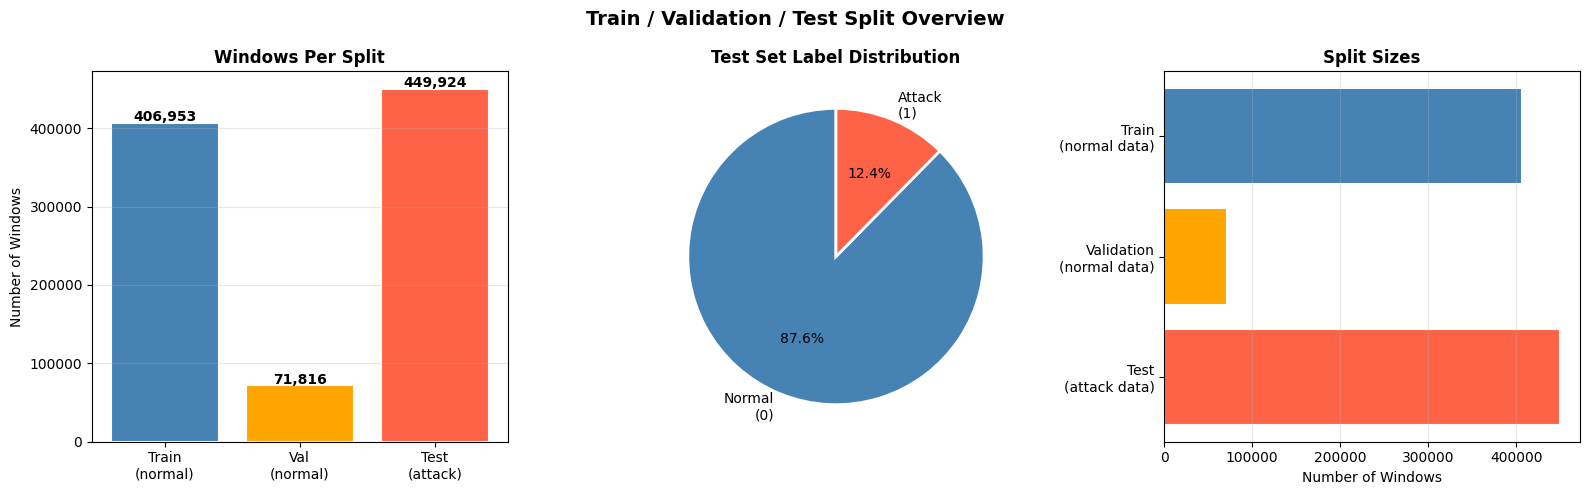

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Train / Validation / Test Split Overview',
             fontsize=14, fontweight='bold')

# ── Plot 1: Window count distribution ────────────────────
counts = [len(X_train), len(X_val), len(X_test)]
colors = ['steelblue', 'orange', 'tomato']
labels = ['Train\n(normal)', 'Val\n(normal)', 'Test\n(attack)']

bars = axes[0].bar(labels, counts, color=colors,
                    edgecolor='white', linewidth=1.5)
axes[0].set_title('Windows Per Split', fontweight='bold')
axes[0].set_ylabel('Number of Windows')
for bar, count in zip(bars, counts):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2000,
        f'{count:,}',
        ha='center', fontweight='bold', fontsize=10
    )
axes[0].grid(True, alpha=0.3, axis='y')

# ── Plot 2: Label distribution in test set ────────────────
test_counts = [(y_test == 0).sum(), (y_test == 1).sum()]
axes[1].pie(
    test_counts,
    labels=['Normal\n(0)', 'Attack\n(1)'],
    colors=['steelblue', 'tomato'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[1].set_title('Test Set Label Distribution',
                   fontweight='bold')

# ── Plot 3: Timeline visualization ───────────────────────
axes[2].barh(
    ['Test\n(attack data)', 'Validation\n(normal data)',
     'Train\n(normal data)'],
    [len(X_test), len(X_val), len(X_train)],
    color=['tomato', 'orange', 'steelblue'],
    edgecolor='white', linewidth=1.5
)
axes[2].set_title('Split Sizes', fontweight='bold')
axes[2].set_xlabel('Number of Windows')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(f'{SPLIT_BASE}/split_overview.png',
            dpi=150, bbox_inches='tight')
plt.show()